# Reading Training Posteriors and Plotting

Train points and labels (5702, 2) (5702,)


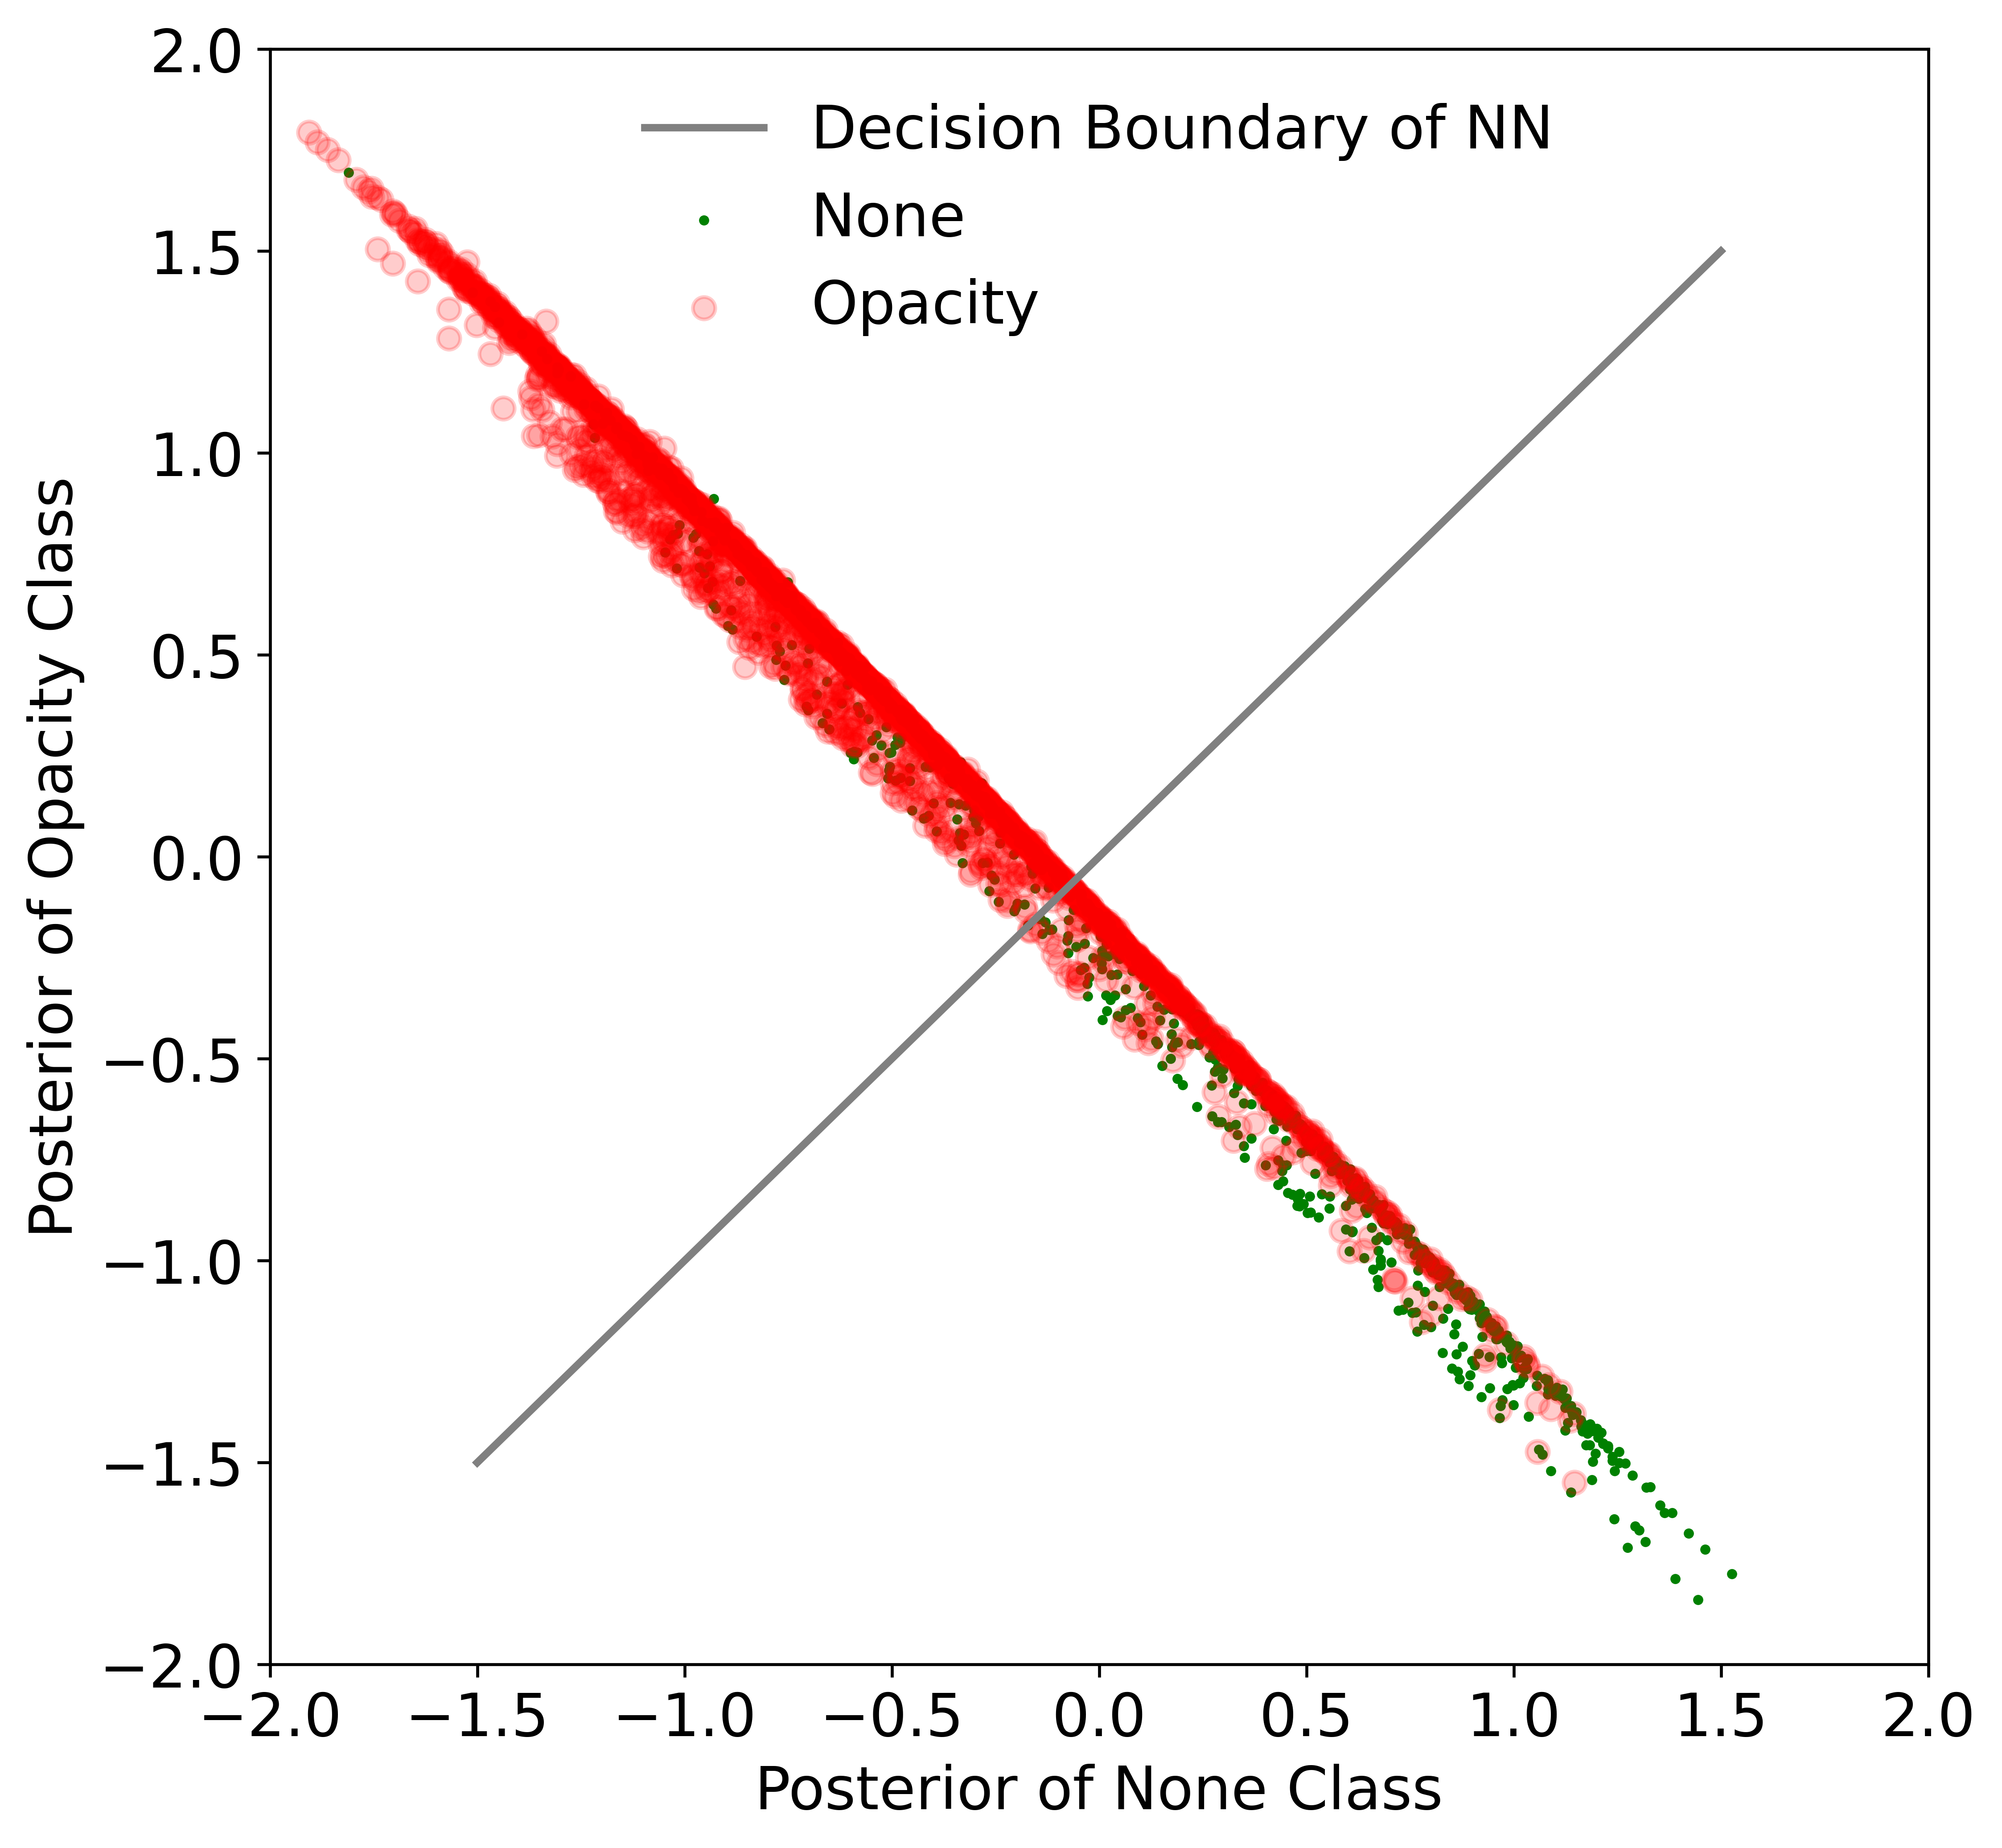

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('../input/siim-fisabio-rsna-classification-tl/train.npy', 'rb') as f:
    points = np.load(f)
    labels = np.load(f)
print('Train points and labels',points.shape, labels.shape)

none_points = np.zeros([len(labels)-sum(labels),2])
opaque_points = np.zeros([sum(labels),2])
iter2 = 0

for iter1 in range(len(labels)):
    if labels[iter1] == 0:
        none_points[iter2,:] = points[iter1,:]
        iter2 = iter2 +1
    if labels[iter1] == 1:
        opaque_points[iter1-iter2,:] = points[iter1,:]
        
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 600
plt.xlim([-2, 2]), plt.ylim([-2, 2])

plt.scatter(none_points[:,0], none_points[:,1],color='g', s=3)
plt.scatter(opaque_points[:,0], opaque_points[:,1],color='r',alpha=0.2)

plt.plot([-1.5, 1.5], [-1.5, 1.5], color = 'grey', linewidth=2)
plt.xlabel("Posterior of None Class")
plt.ylabel("Posterior of Opacity Class")
plt.legend(["Decision Boundary of NN", "None", "Opacity"], loc ="upper center", frameon=False)

#plt.savefig('train_posterior.pdf', bbox_inches = 'tight')  

# Reading Validation Posteriors and Plotting

validation points and labels (316, 2) (316,)
Opaque Points (212, 2)


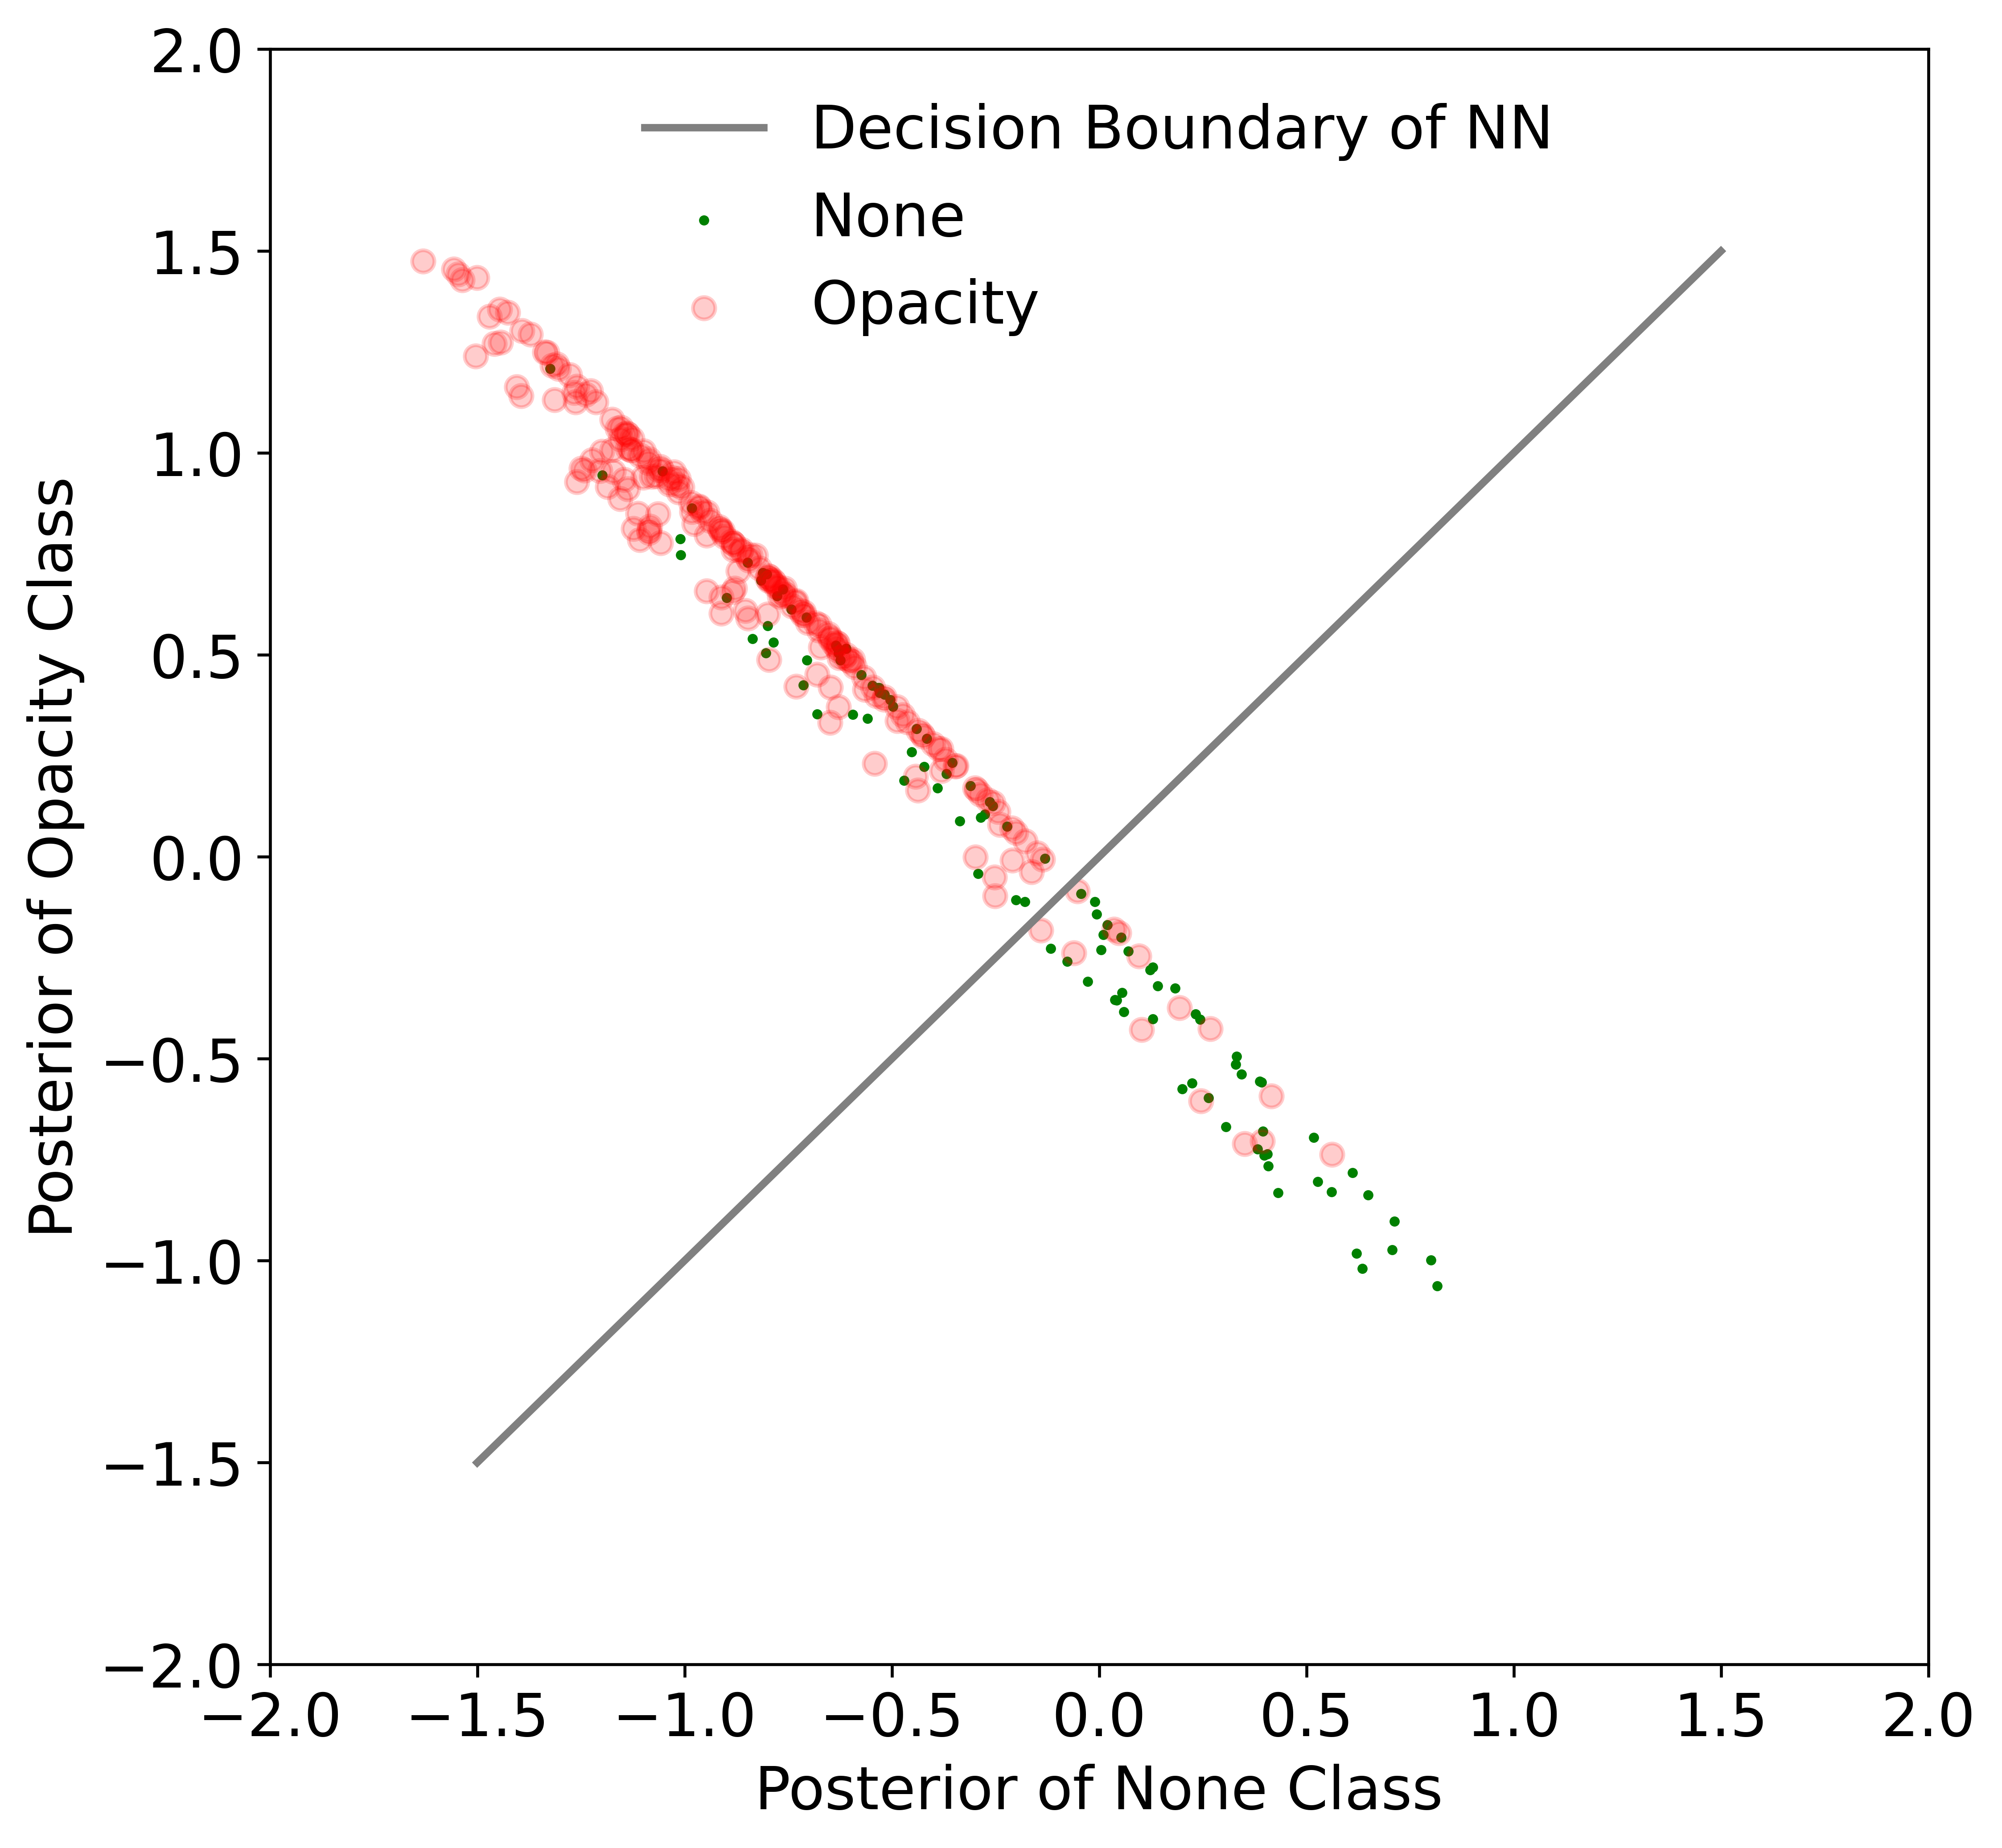

In [2]:
with open('../input/siim-fisabio-rsna-classification-tl/val.npy', 'rb') as f:
    points = np.load(f)
    labels = np.load(f)
print('validation points and labels',points.shape, labels.shape)

none_points = np.zeros([len(labels)-sum(labels),2])
opaque_points = np.zeros([sum(labels),2])
iter2 = 0

for iter1 in range(len(labels)):
    if labels[iter1] == 0:
        none_points[iter2,:] = points[iter1,:]
        iter2 = iter2 +1
    if labels[iter1] == 1:
        opaque_points[iter1-iter2,:] = points[iter1,:]

print('Opaque Points',opaque_points.shape)
        
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 600
plt.xlim([-2, 2]), plt.ylim([-2, 2])

plt.scatter(none_points[:,0], none_points[:,1],color='g', s=3)
plt.scatter(opaque_points[:,0], opaque_points[:,1],color='r',alpha=0.2)

plt.plot([-1.5, 1.5], [-1.5, 1.5], color = 'grey', linewidth=2)
plt.xlabel("Posterior of None Class")
plt.ylabel("Posterior of Opacity Class")
plt.legend(["Decision Boundary of NN", "None", "Opacity"], loc ="upper center", frameon=False)

#plt.savefig('val_posterior.pdf', bbox_inches = 'tight')  

# Reading Test Posteriors and Plotting

Test points and labels (316, 2) (316,)


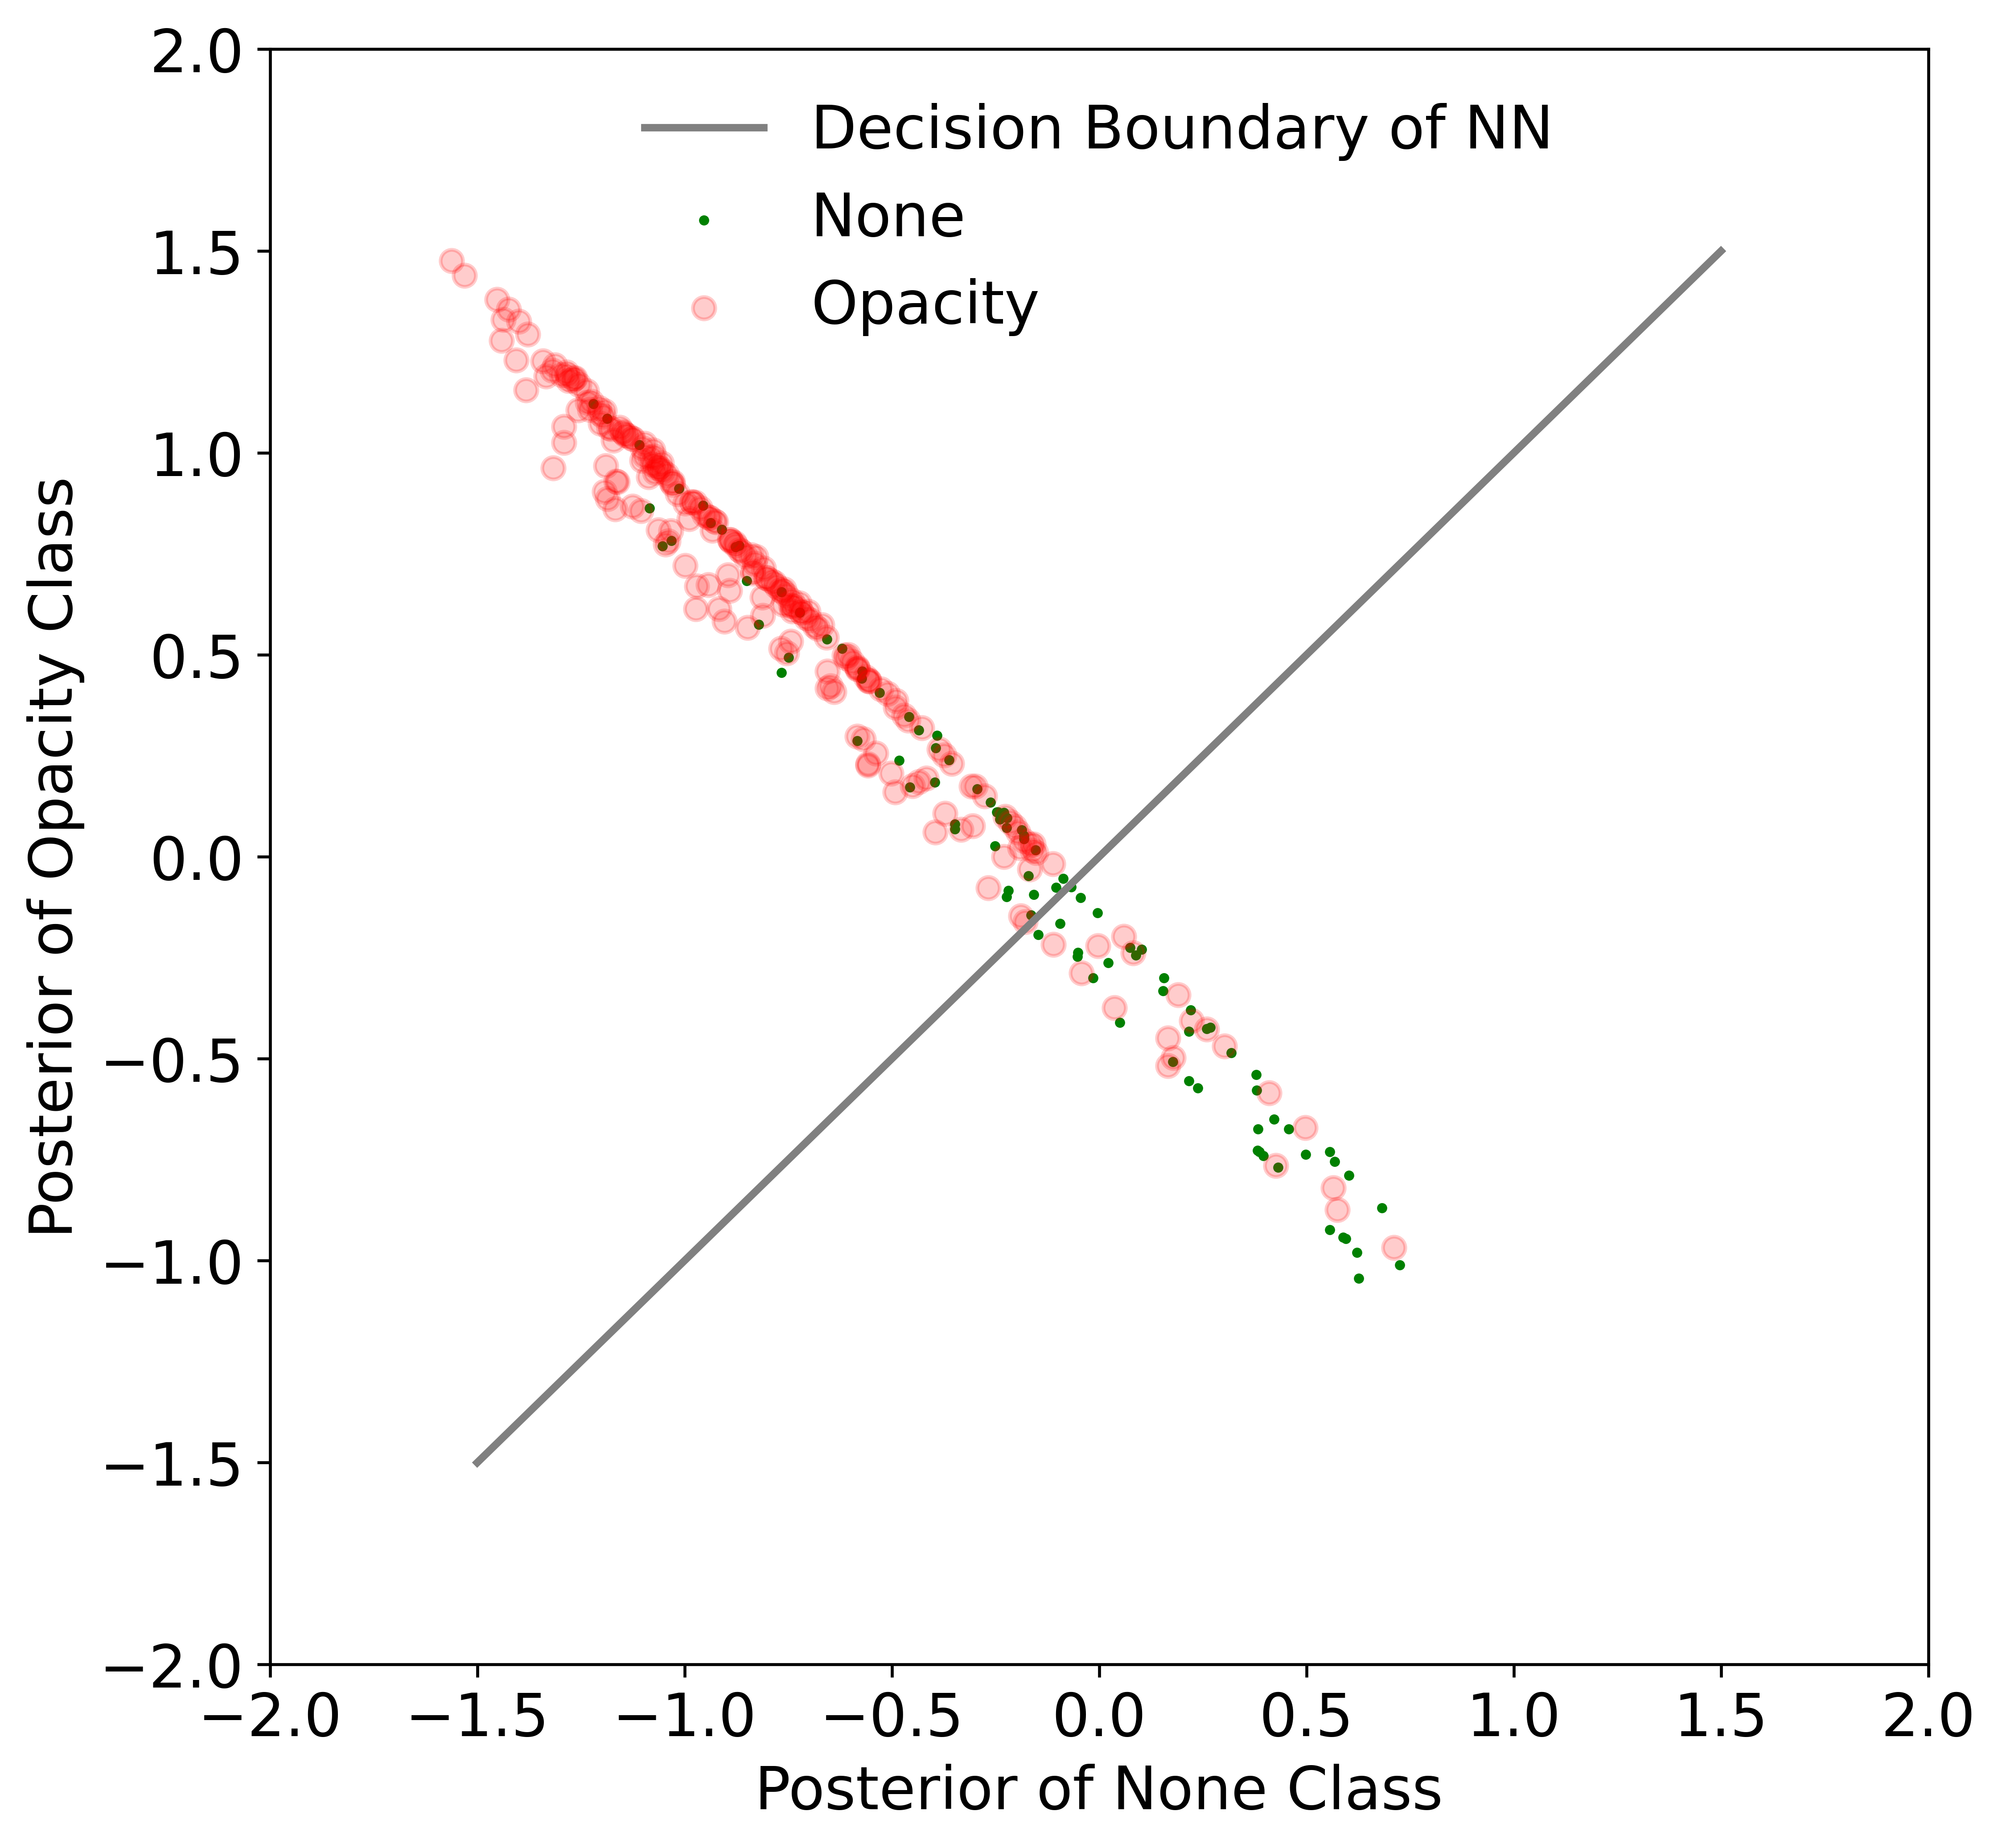

In [3]:
with open('../input/siim-fisabio-rsna-classification-tl/test.npy', 'rb') as f:
    points = np.load(f)
    labels = np.load(f)
print('Test points and labels',points.shape, labels.shape)

none_points = np.zeros([len(labels)-sum(labels),2])
opaque_points = np.zeros([sum(labels),2])
iter2 = 0

for iter1 in range(len(labels)):
    if labels[iter1] == 0:
        none_points[iter2,:] = points[iter1,:]
        iter2 = iter2 +1
    if labels[iter1] == 1:
        opaque_points[iter1-iter2,:] = points[iter1,:]
        
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 600
plt.xlim([-2, 2]), plt.ylim([-2, 2])

plt.scatter(none_points[:,0], none_points[:,1],color='g', s=3)
plt.scatter(opaque_points[:,0], opaque_points[:,1],color='r',alpha=0.2)

plt.plot([-1.5, 1.5], [-1.5, 1.5], color = 'grey', linewidth=2)
plt.xlabel("Posterior of None Class")
plt.ylabel("Posterior of Opacity Class")
plt.legend(["Decision Boundary of NN", "None", "Opacity"], loc ="upper center", frameon=False)

#plt.savefig('test_posterior.pdf', bbox_inches = 'tight')  

# Probabilistic Opacity in a Validation Point

In [4]:
k_nearest = 10
validation_index = 1
distance_offset =1e-5

with open('../input/siim-fisabio-rsna-classification-tl/train.npy', 'rb') as f:
    points_train = np.load(f)
    labels_train = np.load(f)
print('Train points and labels',points.shape, labels.shape)

with open('../input/siim-fisabio-rsna-classification-tl/val.npy', 'rb') as f:
    points = np.load(f)
    labels = np.load(f)
print('Shape of validation points and labels',points.shape, labels.shape)

point = points[validation_index,:]
print('Validation point: ',point, 'Groundtruth Label:',labels[validation_index])

ms_distance = np.zeros([len(labels_train),2])
# ms_distance is the mean square distance
for iter1 in range(len(labels_train)):
    ms_distance[iter1,:] = [np.mean(np.power(point- points_train[iter1,:],2)), labels_train[iter1]]
    
    
sorted_array = ms_distance[np.argsort(ms_distance[:, 0])]

print(sorted_array[0:k_nearest,:])

numerator = 0
denominator = 0
for iter1 in range(k_nearest):
    numerator = numerator + sorted_array[iter1,1]/(distance_offset + sorted_array[iter1,0])
    denominator = denominator + 1/(distance_offset + sorted_array[iter1,0])
    
print("\nOpacity Probability: ", np.round(10000*(numerator/denominator))/100,'%' )

Train points and labels (316, 2) (316,)
Shape of validation points and labels (316, 2) (316,)
Validation point:  [-1.0583346  0.9662497] Groundtruth Label: 1
[[1.06032633e-06 1.00000000e+00]
 [2.51999040e-06 1.00000000e+00]
 [9.55744690e-06 1.00000000e+00]
 [1.48182980e-05 1.00000000e+00]
 [1.77872862e-05 0.00000000e+00]
 [1.92285097e-05 1.00000000e+00]
 [2.03684340e-05 1.00000000e+00]
 [2.08665770e-05 1.00000000e+00]
 [3.06805232e-05 0.00000000e+00]
 [3.23430722e-05 1.00000000e+00]]

Opacity Probability:  86.4 %


# Probabilistic Opacity in Validation Points by Labels

In [5]:
val_index_prob_0 =np.zeros([len(labels)-sum(labels),2])
val_index_prob_1 =np.zeros([sum(labels),2])
index_0 =0
index_1=0
ms_distance = np.zeros([len(labels_train),2])

for validation_index in range(len(labels)):#len(labels)
    point = points[validation_index,:]
    
    for iter1 in range(len(labels_train)):
        ms_distance[iter1,:] = [np.mean(np.power(point- points_train[iter1,:],2)), labels_train[iter1]]

    sorted_array = ms_distance[np.argsort(ms_distance[:, 0])]

    numerator = 0
    denominator = 0
    for iter1 in range(k_nearest):
        numerator = numerator + sorted_array[iter1,1]/(distance_offset + sorted_array[iter1,0])
        denominator = denominator + 1/(distance_offset + sorted_array[iter1,0])

    opacity_probability = np.round(10000*(numerator/denominator))/100
    if labels[validation_index]==0:
        val_index_prob_0[index_0] = [validation_index, opacity_probability]
        index_0 = index_0 + 1
    if labels[validation_index]==1:
        val_index_prob_1[index_1] = [validation_index, opacity_probability]
        index_1 = index_1 + 1
    #print('Validation Point no: ', validation_index,'Opacity Probability: ', opacity_probability,'%', ' Groundtruth Label:',labels[validation_index])
    


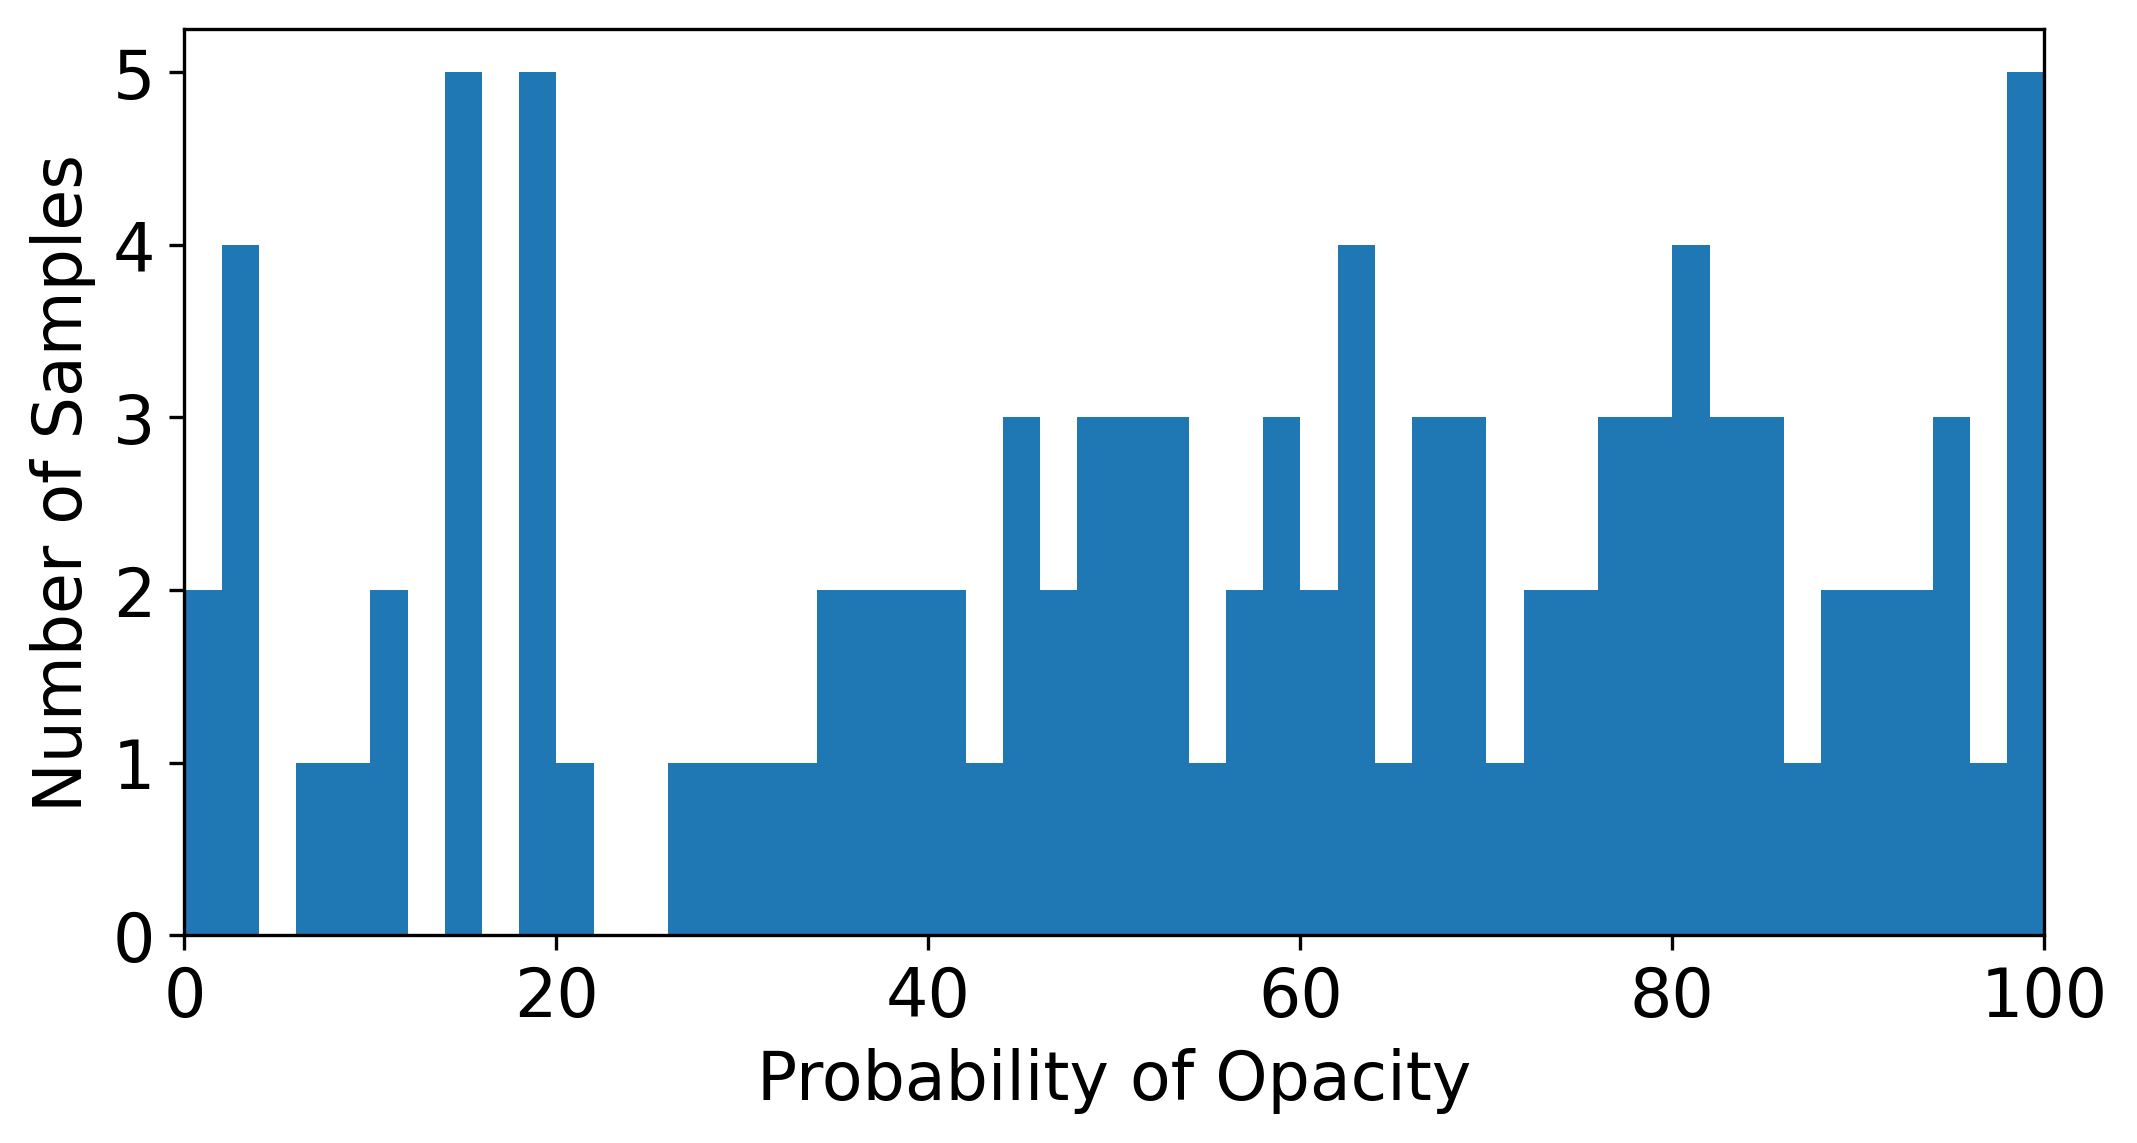

In [6]:
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 300

plt.hist(val_index_prob_0[:,1],50)

plt.xlabel("Probability of Opacity")
plt.ylabel("Number of Samples")
plt.xlim([0, 100])
plt.savefig('val_hist_class0.pdf', bbox_inches = 'tight')  

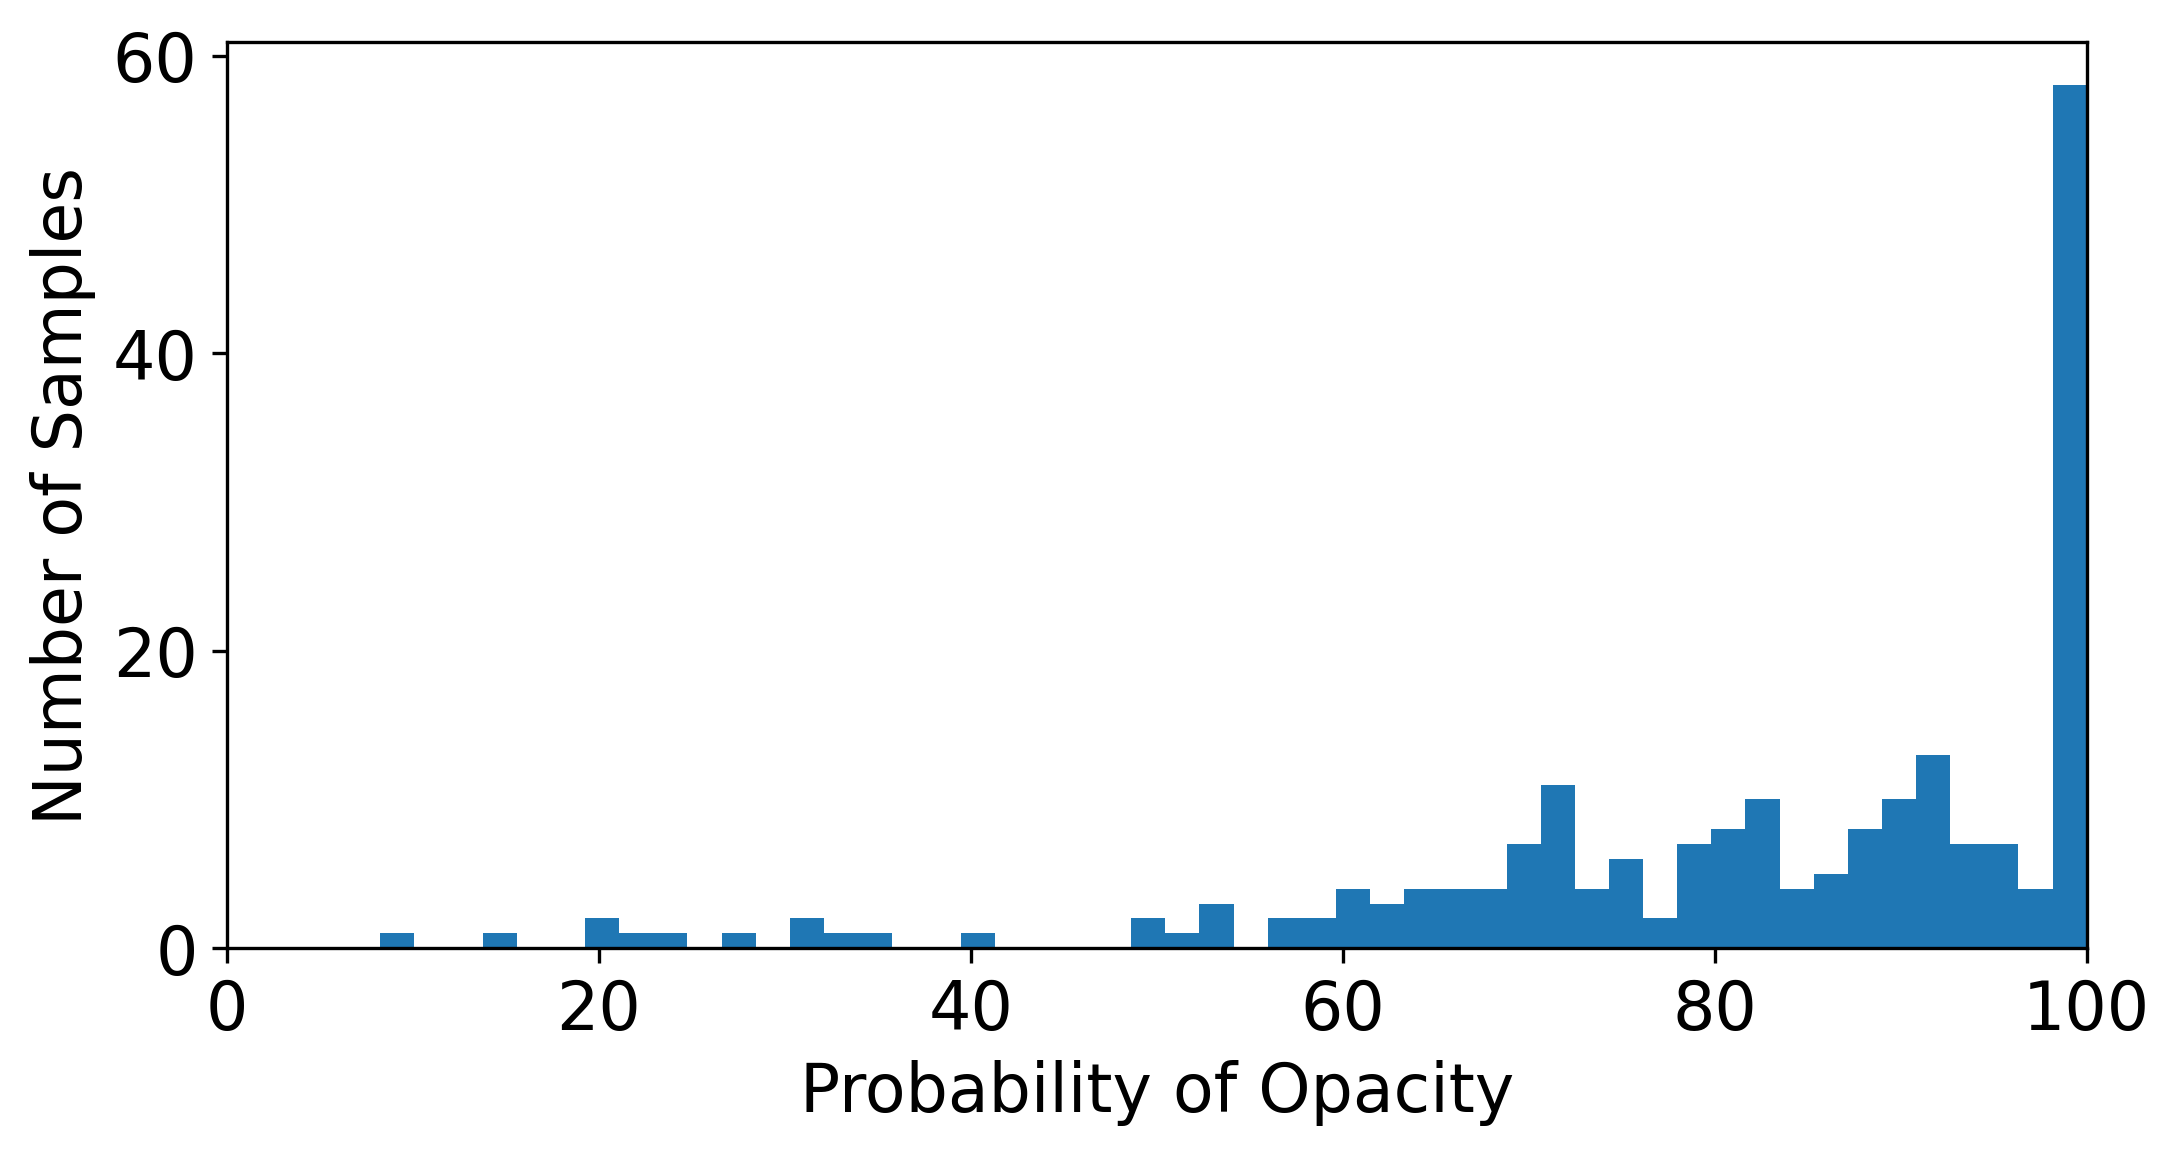

In [7]:
plt.hist(val_index_prob_1[:,1],50)

plt.xlabel("Probability of Opacity")
plt.ylabel("Number of Samples")
plt.xlim([0, 100])
plt.savefig('val_hist_class1.pdf', bbox_inches = 'tight')  

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.99528302 0.99528302 0.99528302
  0.99528302 0.99528302 0.99528302 0.99528302 0.99056604 0.99056604
  0.99056604 0.99056604 0.98584906 0.98113208 0.98113208 0.97641509
  0.97169811 0.97169811 0.97169811 0.97169811 0.96698113 0.96698113
  0.96698113 0.96698113 0.95754717 0.95283019 0.95283019 0.94811321
  0.94811321 0.94811321 0.94811321 0.94811321 0.94811321 0.94811321
  0.94339623 0.94339623 0.94339623 0.94339623 0.94339623 0.94339623
  0.94339623 0.93867925 0.93396226 0.93396226 0.92924528 0.92924528
  0.91509434 0.91509434 0.91509434 0.91509434 0.9009434  0.89622642
  0.89622642 0.88207547 0.87735849 0.87735849 0.85377358 0.84433962
  0.8254717  0.82075472 0.82075472 0.79716981 0.79716981 0.76886792
  0.72641509 0.71226415 0.70754717 0.69339623 0.6745283  0.66509434
  0.66509434 0.64150943 0.62735849 0.61320755 0.58490566 0.55660377
  0.53773585 0.53301887 0.51415094 0.50471698 0.48584906

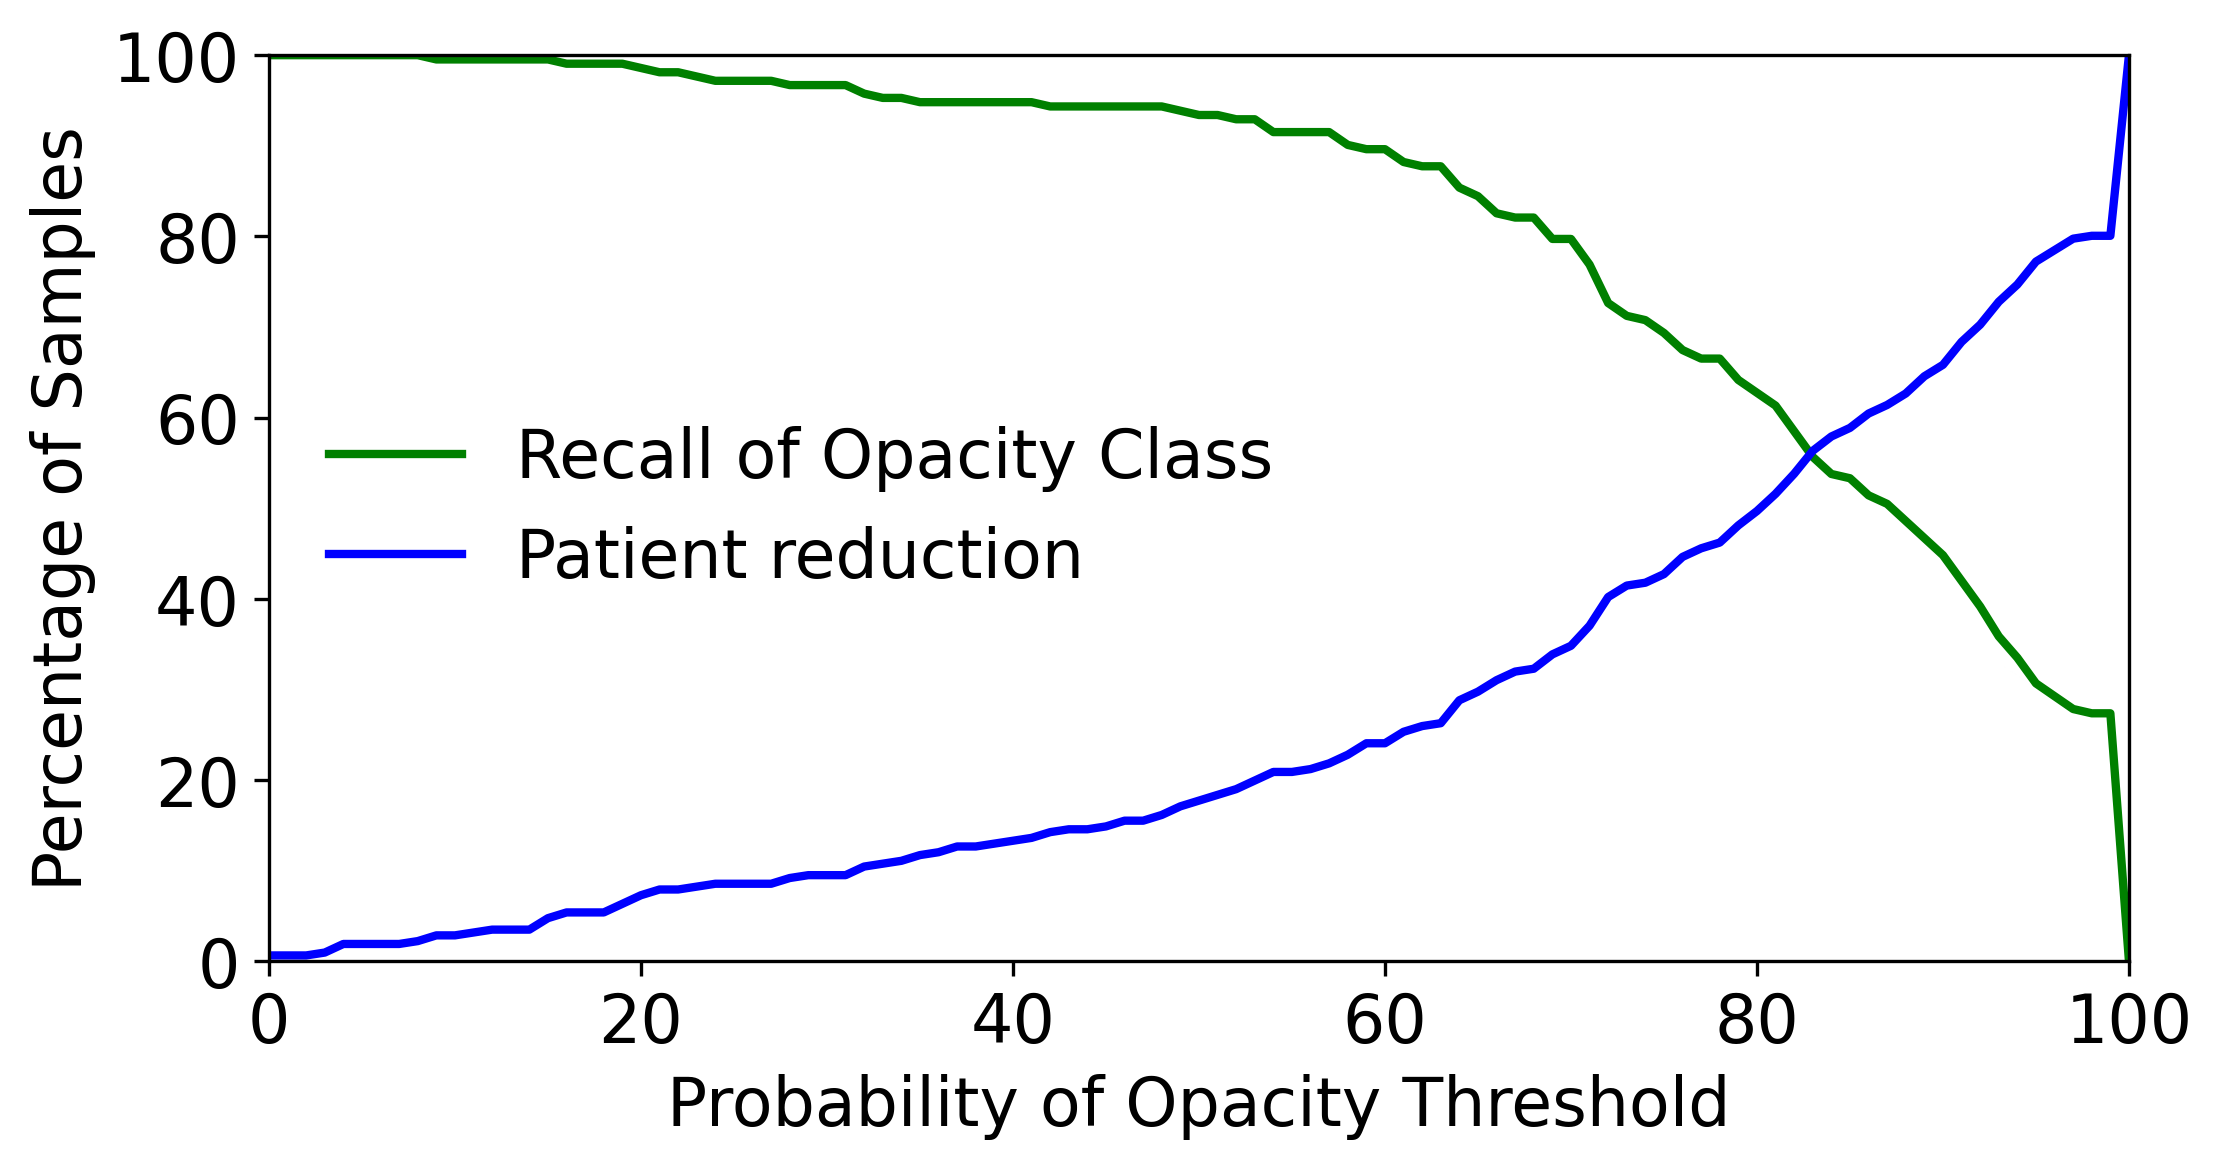

In [8]:
length_of_opacity = len(val_index_prob_1[:,1])
length_of_none = len(val_index_prob_0[:,1])

opacity_covered = np.zeros([101,1])
patient_reduction = np.zeros([101,1])

for iter1 in range(101):
    opacity_covered[iter1] = np.sum(val_index_prob_1[:,1] > iter1) / length_of_opacity
    patient_reduction[iter1] = (np.sum(val_index_prob_1[:,1] <= iter1) + np.sum(val_index_prob_0[:,1] <= iter1)) / (length_of_opacity + length_of_none)
    
print(np.transpose(opacity_covered),'\n\n', np.transpose(patient_reduction))

plt.plot(range(101),opacity_covered*100,  color = 'green', linewidth=2)
plt.plot(range(101),patient_reduction*100, color = 'blue', linewidth=2)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Probability of Opacity Threshold")
plt.ylabel("Percentage of Samples")
plt.legend(["Recall of Opacity Class","Patient reduction"], loc ="center left", frameon=False)
plt.savefig('val_opacityTH.pdf', bbox_inches = 'tight')  

# Probabilistic Opacity Distribution in Training Points by Labels

In [9]:
with open('../input/siim-fisabio-rsna-classification-tl/train.npy', 'rb') as f:
    points_train = np.load(f)
    labels_train = np.load(f)
print('Train points and labels',points.shape, labels.shape)

points = points_train
labels = labels_train
print('Shape of train points and labels',points.shape, labels.shape)

# Using the same variable names for ease and memory efficiency
val_index_prob_0 =np.zeros([len(labels)-sum(labels),2])
val_index_prob_1 =np.zeros([sum(labels),2])
index_0 =0
index_1=0
ms_distance = np.zeros([len(labels_train),2])

for validation_index in range(len(labels)):#len(labels)
    point = points[validation_index,:]
    
    for iter1 in range(len(labels_train)):
        ms_distance[iter1,:] = [np.mean(np.power(point- points_train[iter1,:],2)), labels_train[iter1]]

    sorted_array = ms_distance[np.argsort(ms_distance[:, 0])]

    numerator = 0
    denominator = 0
    for iter1 in range(k_nearest):
        numerator = numerator + sorted_array[iter1,1]/(distance_offset + sorted_array[iter1,0])
        denominator = denominator + 1/(distance_offset + sorted_array[iter1,0])

    opacity_probability = np.round(10000*(numerator/denominator))/100
    if labels[validation_index]==0:
        val_index_prob_0[index_0] = [validation_index, opacity_probability]
        index_0 = index_0 + 1
    if labels[validation_index]==1:
        val_index_prob_1[index_1] = [validation_index, opacity_probability]
        index_1 = index_1 + 1
    #print('Validation Point no: ', validation_index,'Opacity Probability: ', opacity_probability,'%', ' Groundtruth Label:',labels[validation_index])

Train points and labels (316, 2) (316,)
Shape of train points and labels (5702, 2) (5702,)


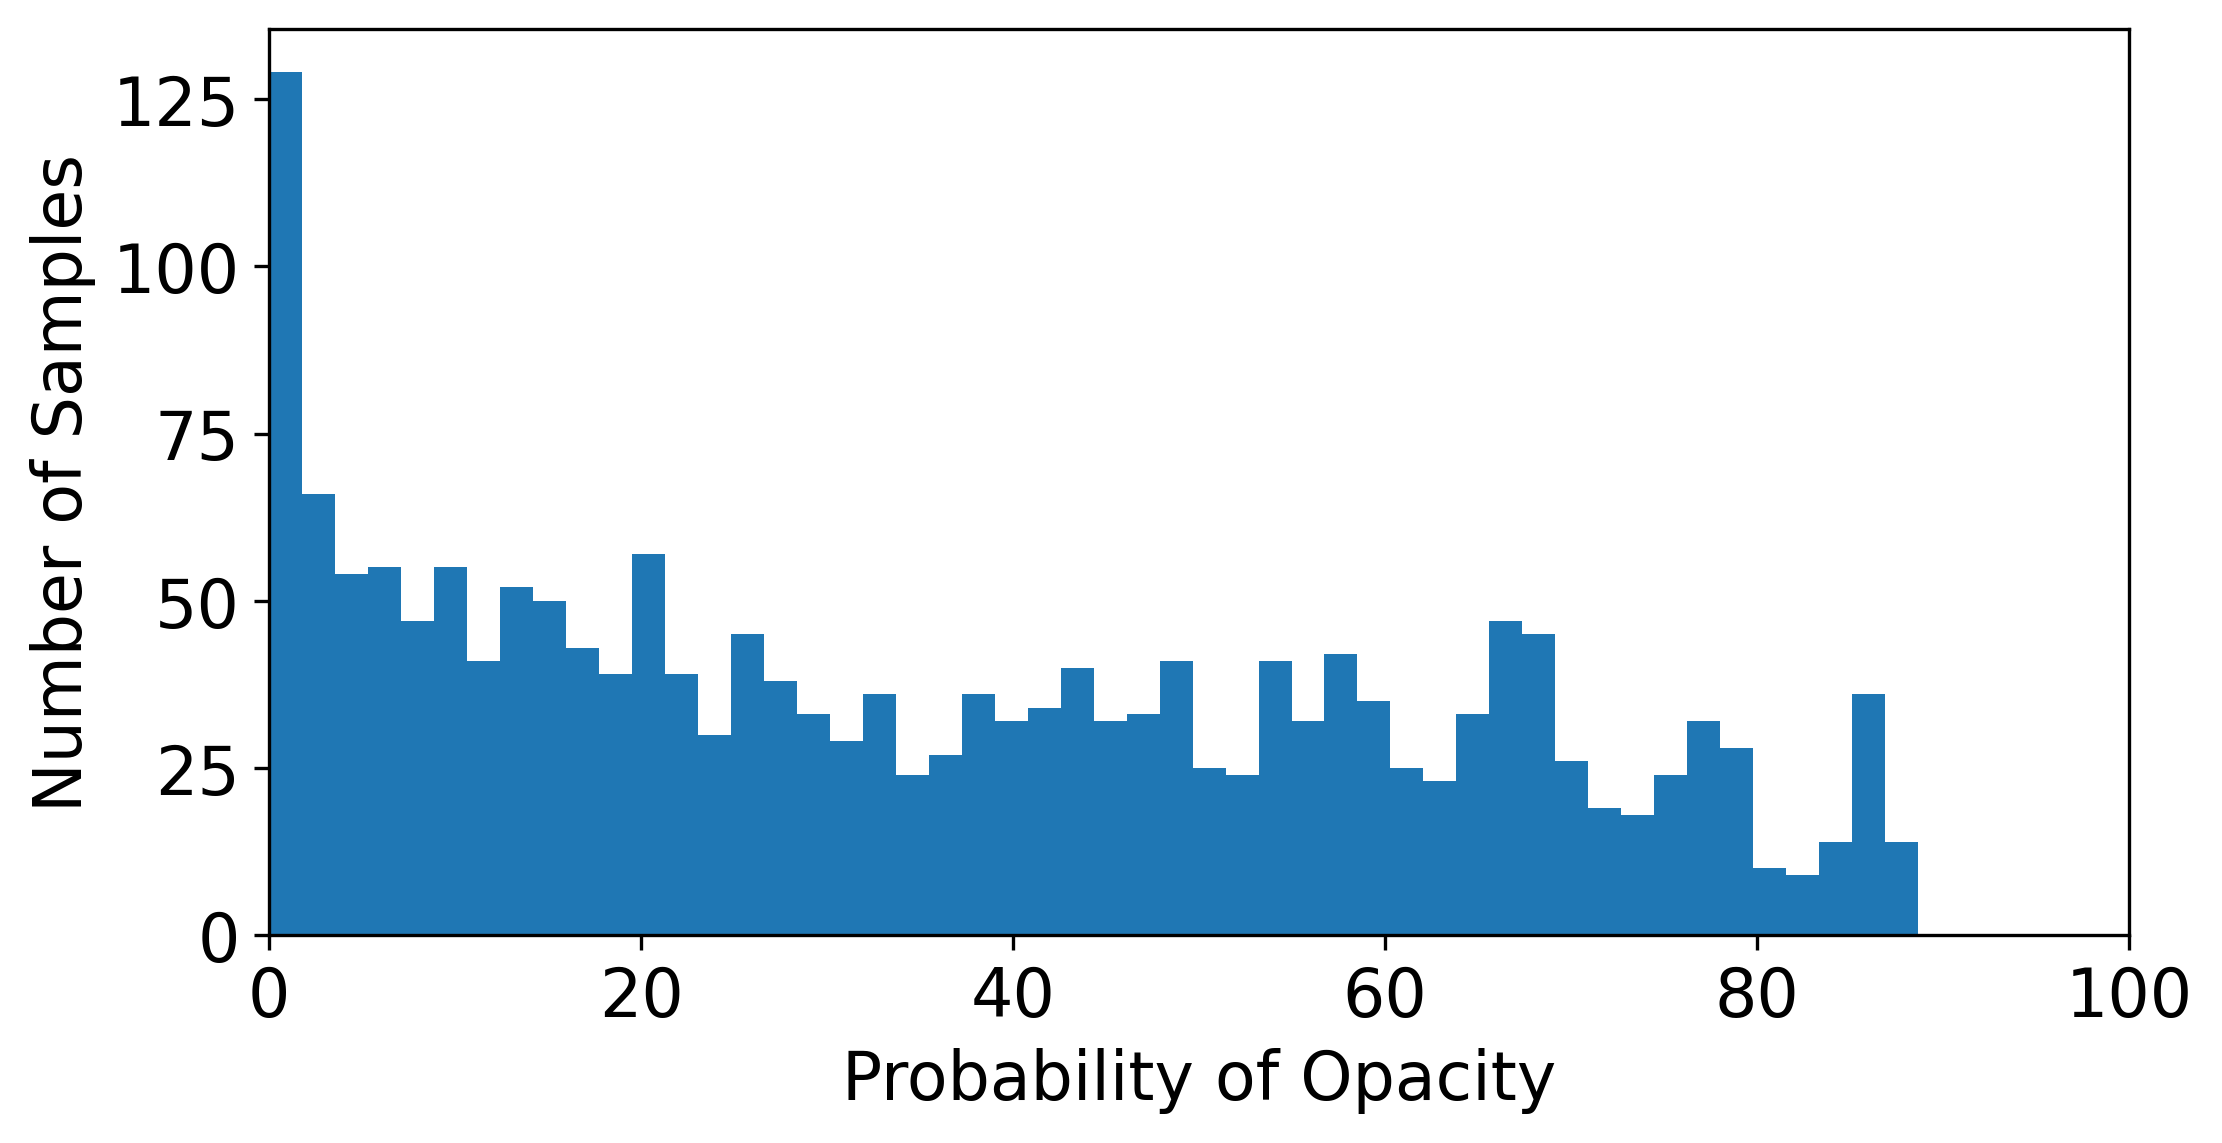

In [10]:
plt.hist(val_index_prob_0[:,1],50)

plt.xlabel("Probability of Opacity")
plt.ylabel("Number of Samples")
plt.xlim([0, 100])
plt.savefig('train_hist_class0.pdf', bbox_inches = 'tight')  

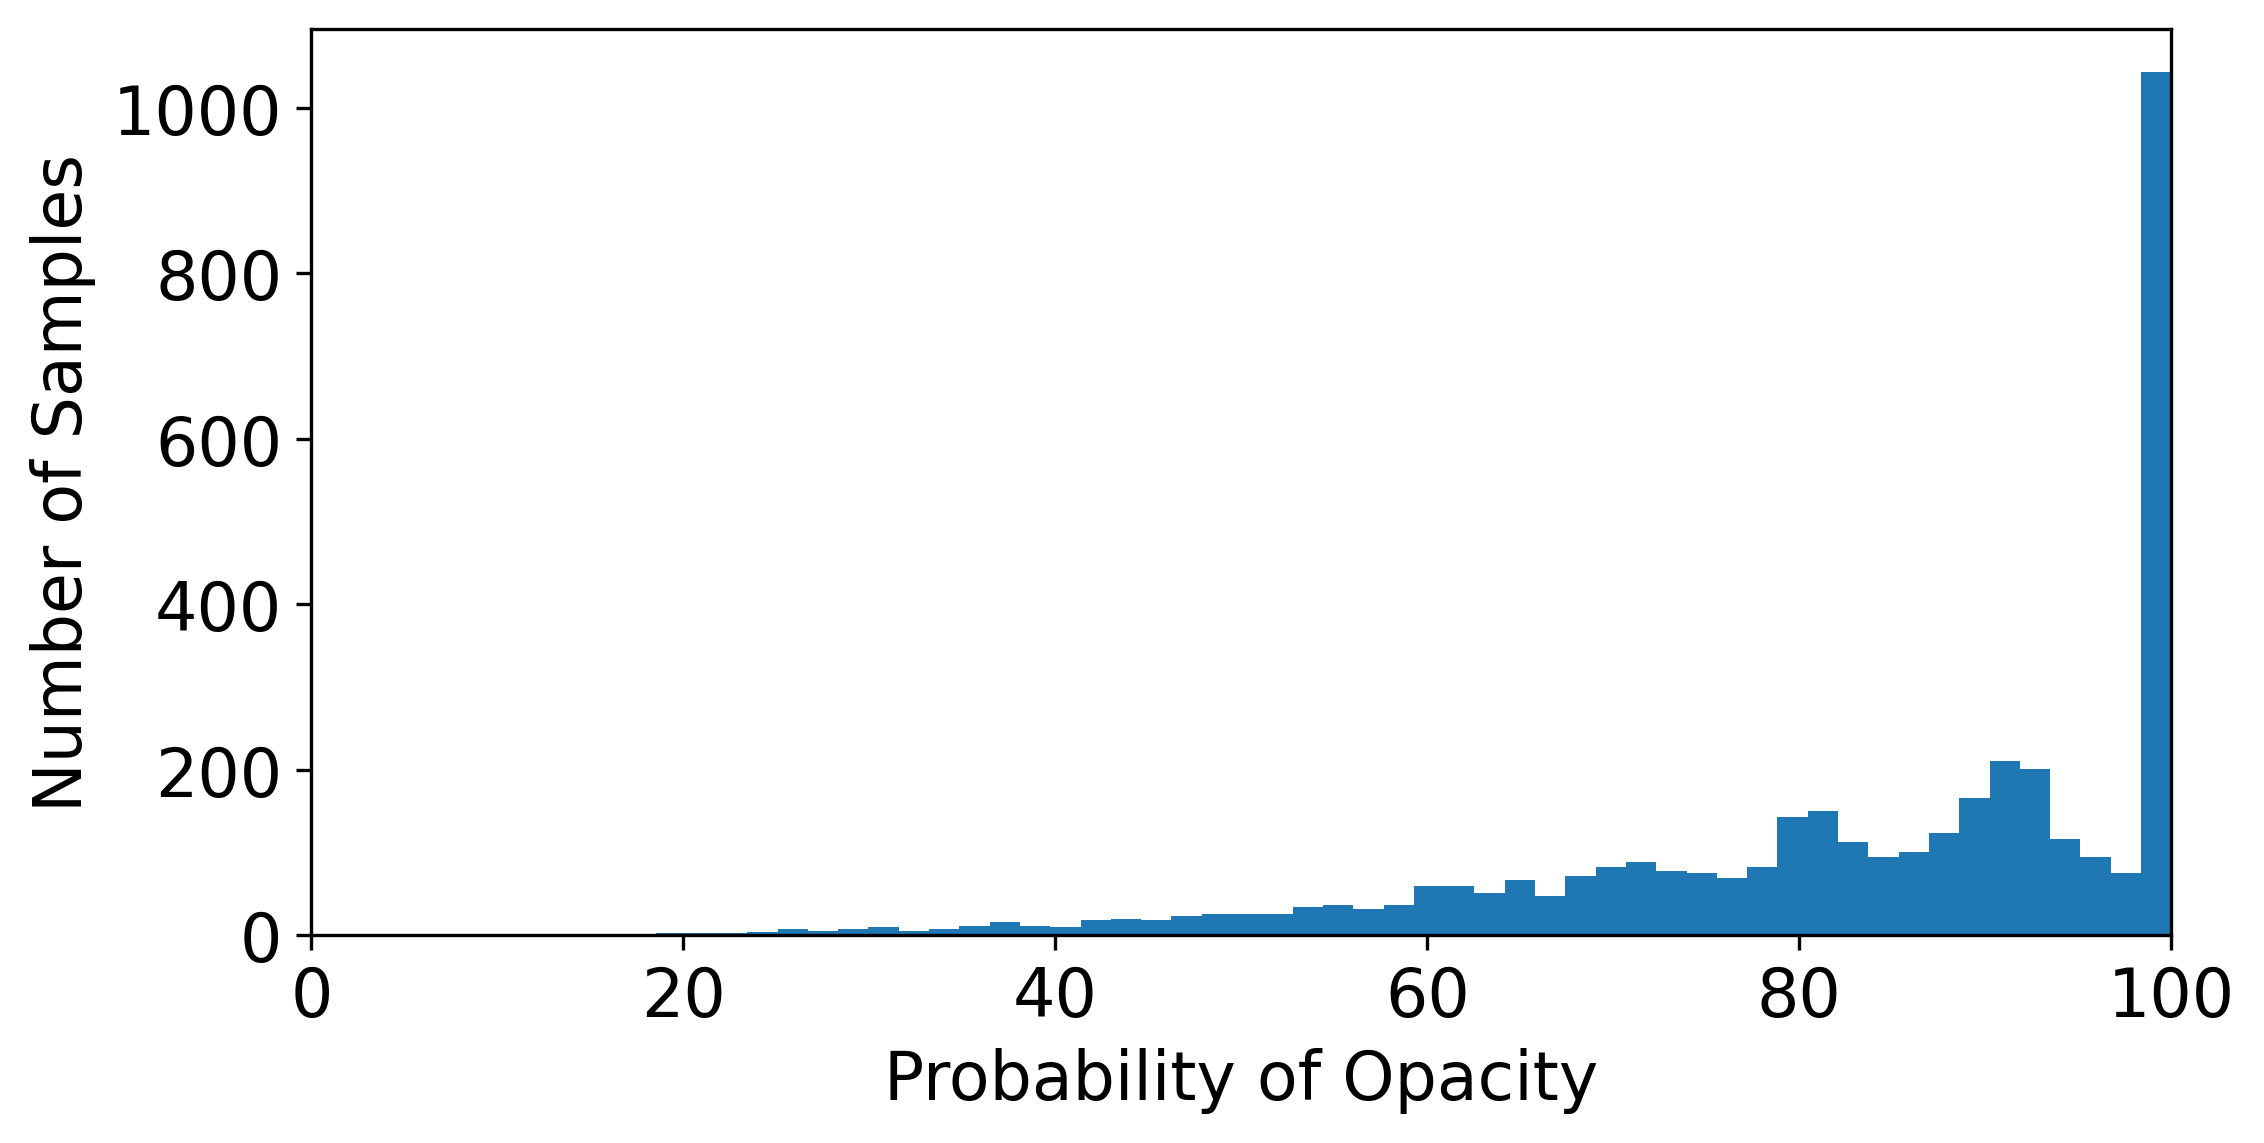

In [11]:
plt.hist(val_index_prob_1[:,1],50)

plt.xlabel("Probability of Opacity")
plt.ylabel("Number of Samples")
plt.xlim([0, 100])
plt.savefig('train_hist_class1.pdf', bbox_inches = 'tight')  

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         0.99948227 0.9992234  0.99896454 0.99818794 0.9976702
  0.99689361 0.99663474 0.99585814 0.99430494 0.99326948 0.99223402
  0.99119855 0.98990422 0.98860989 0.98757442 0.98628009 0.98550349
  0.98369143 0.98110277 0.97877297 0.97644318 0.97540771 0.97411338
  0.97048926 0.96841833 0.9647942  0.96220554 0.95909915 0.95521615
  0.95210976 0.94745017 0.94356718 0.94020192 0.93580119 0.9319182
  0.92699974 0.92078695 0.91457417 0.90991457 0.90396065 0.89774786
  0.88946415 0.88014497 0.86979032 0.86254207 0.85399948 0.84260937
  0.83354906 0.82733627 0.81749935 0.80507378 0.7934248  0.77970489
  0.76417292 0.75278281 0.73958064 0.72870826 0.71498835 0.7054103
  0.69350246 0.67771162 0.65544913 0.63033911 0.60652343 0.58581413
  0.56976443 0.55630339 0.54232462 0.52498059 0.50711882 0.48330313
  0.455

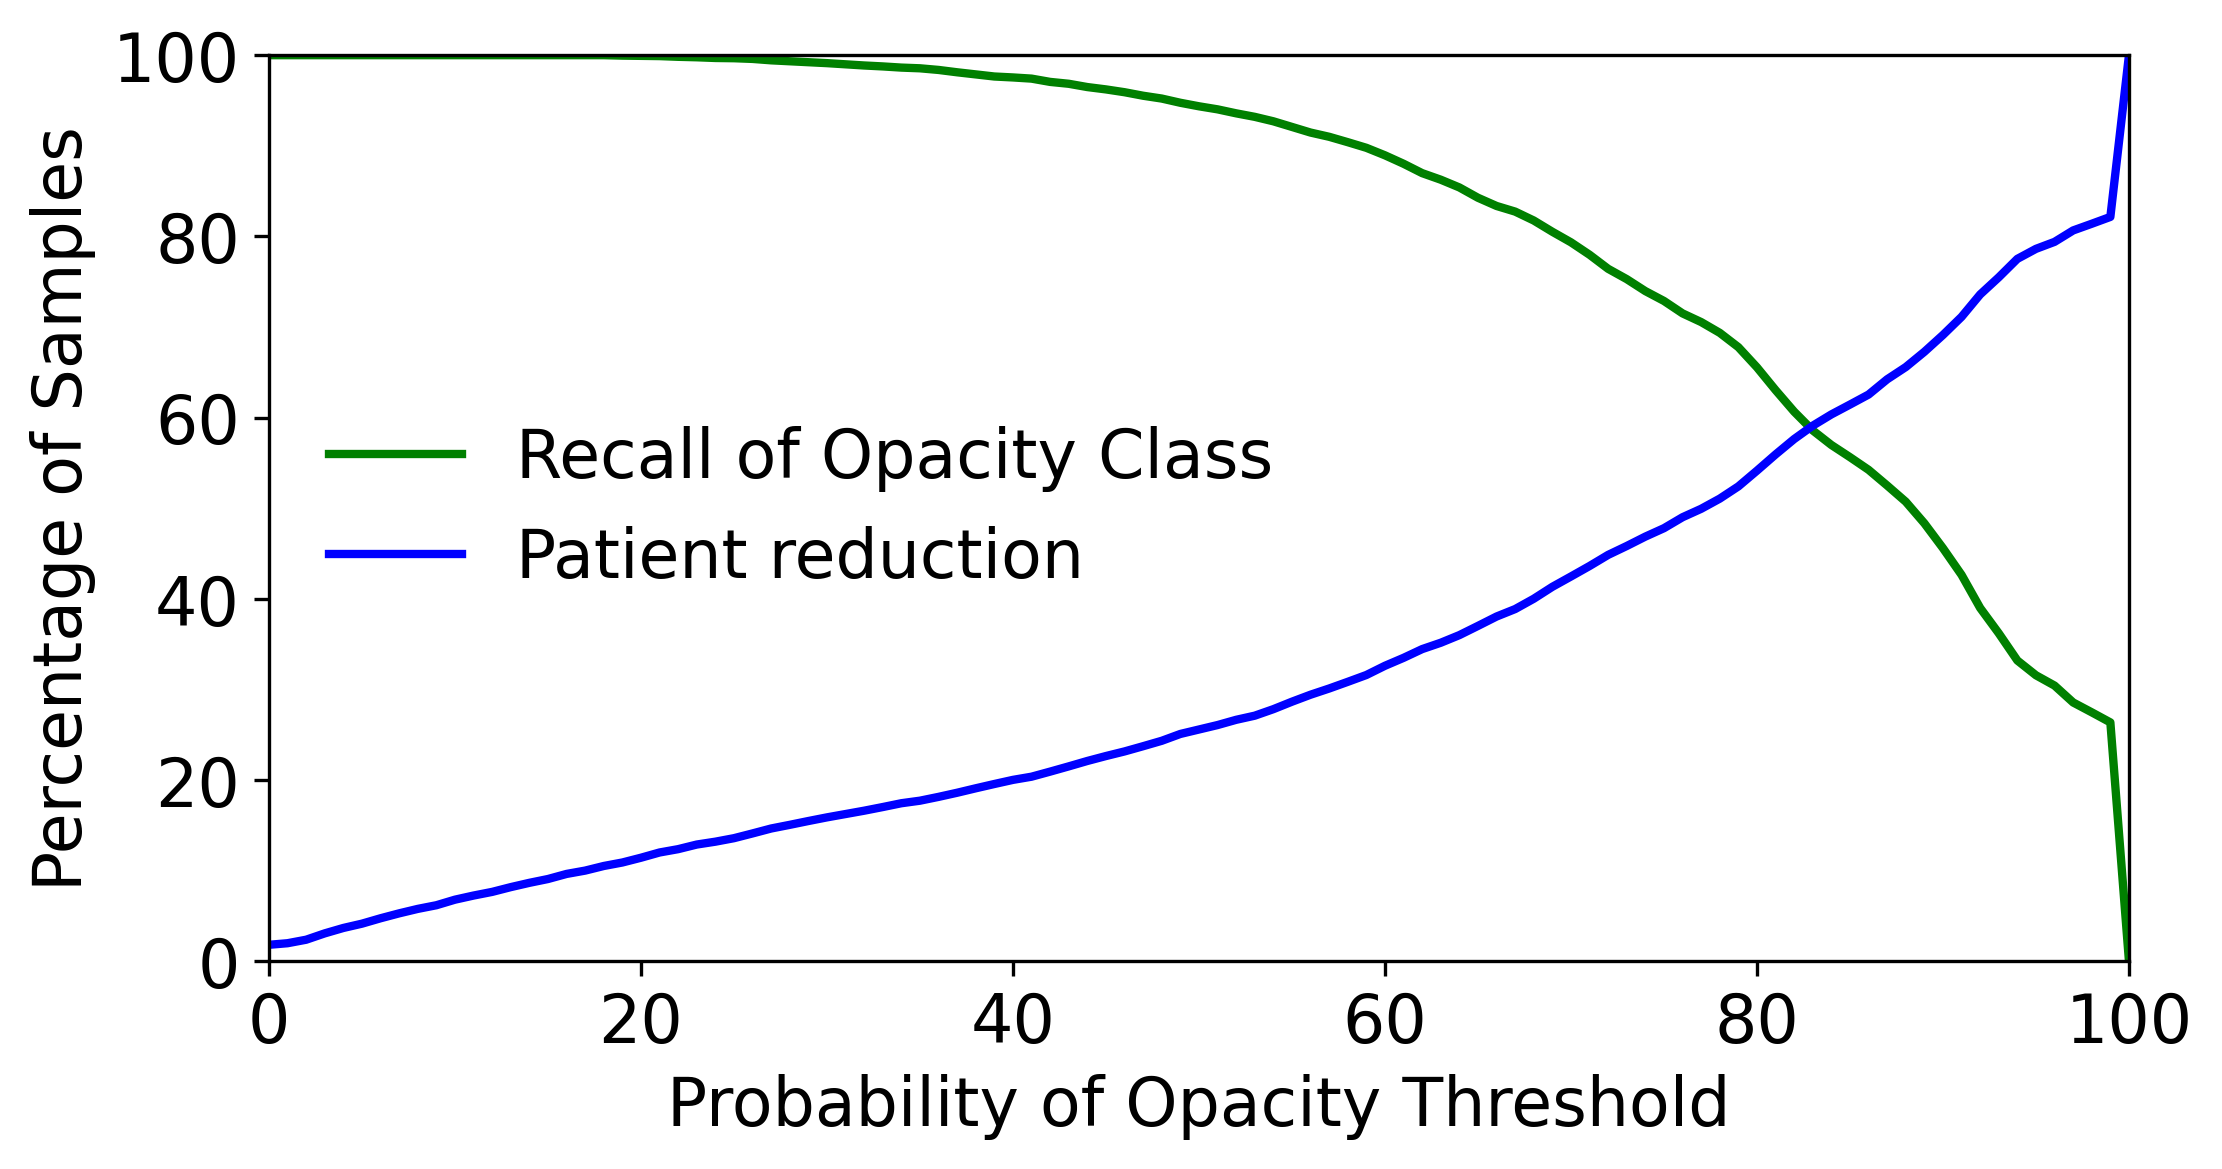

In [12]:
length_of_opacity = len(val_index_prob_1[:,1])
length_of_none = len(val_index_prob_0[:,1])

opacity_covered = np.zeros([101,1])
patient_reduction = np.zeros([101,1])

for iter1 in range(101):
    opacity_covered[iter1] = np.sum(val_index_prob_1[:,1] > iter1) / length_of_opacity
    patient_reduction[iter1] = (np.sum(val_index_prob_1[:,1] <= iter1) + np.sum(val_index_prob_0[:,1] <= iter1)) / (length_of_opacity + length_of_none)
    
print(np.transpose(opacity_covered),'\n\n', np.transpose(patient_reduction))
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 300

plt.plot(range(101),opacity_covered*100,  color = 'green', linewidth=2)
plt.plot(range(101),patient_reduction*100, color = 'blue', linewidth=2)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Probability of Opacity Threshold")
plt.ylabel("Percentage of Samples")
plt.legend(["Recall of Opacity Class","Patient reduction"], loc ="center left", frameon=False)
plt.savefig('train_opacityTH.pdf', bbox_inches = 'tight')  

# Probabilistic Opacity Distribution in Test Points by Labels

In [13]:
with open('../input/siim-fisabio-rsna-classification-tl/train.npy', 'rb') as f:
    points_train = np.load(f)
    labels_train = np.load(f)
print('Train points and labels',points.shape, labels.shape)

with open('../input/siim-fisabio-rsna-classification-tl/test.npy', 'rb') as f:
    points = np.load(f)
    labels = np.load(f)
print('Shape of test points and labels',points.shape, labels.shape)

# Using the same variable names for ease and memory efficiency
val_index_prob_0 =np.zeros([len(labels)-sum(labels),2])
val_index_prob_1 =np.zeros([sum(labels),2])
index_0 =0
index_1=0
ms_distance = np.zeros([len(labels_train),2])

for validation_index in range(len(labels)):#len(labels)
    point = points[validation_index,:]
    
    for iter1 in range(len(labels_train)):
        ms_distance[iter1,:] = [np.mean(np.power(point- points_train[iter1,:],2)), labels_train[iter1]]

    sorted_array = ms_distance[np.argsort(ms_distance[:, 0])]

    numerator = 0
    denominator = 0
    for iter1 in range(k_nearest):
        numerator = numerator + sorted_array[iter1,1]/(distance_offset + sorted_array[iter1,0])
        denominator = denominator + 1/(distance_offset + sorted_array[iter1,0])

    opacity_probability = np.round(10000*(numerator/denominator))/100
    if labels[validation_index]==0:
        val_index_prob_0[index_0] = [validation_index, opacity_probability]
        index_0 = index_0 + 1
    if labels[validation_index]==1:
        val_index_prob_1[index_1] = [validation_index, opacity_probability]
        index_1 = index_1 + 1
    #print('Validation Point no: ', validation_index,'Opacity Probability: ', opacity_probability,'%', ' Groundtruth Label:',labels[validation_index])

Train points and labels (5702, 2) (5702,)
Shape of test points and labels (316, 2) (316,)


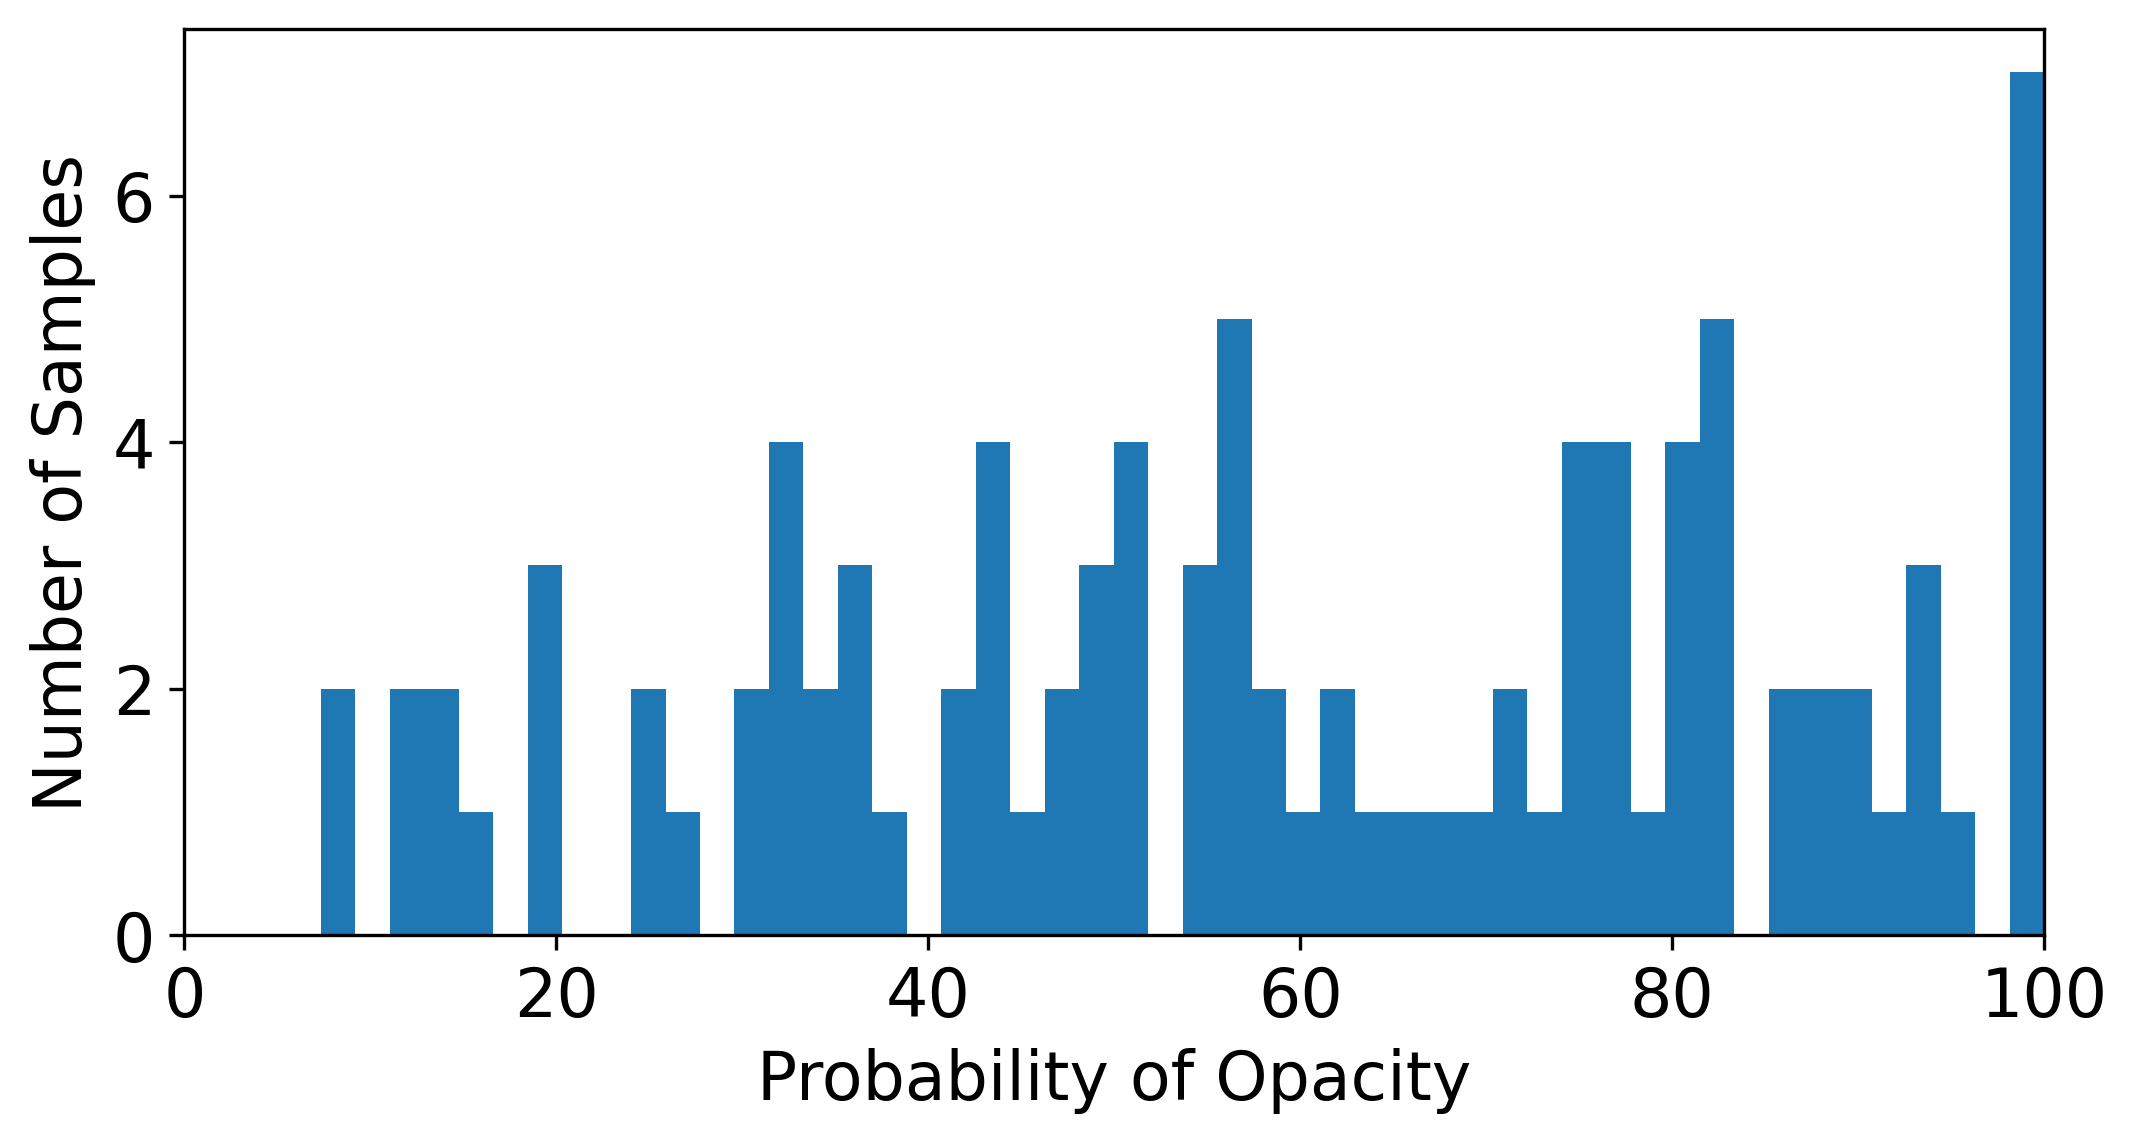

In [14]:
plt.hist(val_index_prob_0[:,1],50)

plt.xlabel("Probability of Opacity")
plt.ylabel("Number of Samples")
plt.xlim([0, 100])
plt.savefig('test_hist_class0.pdf', bbox_inches = 'tight')  

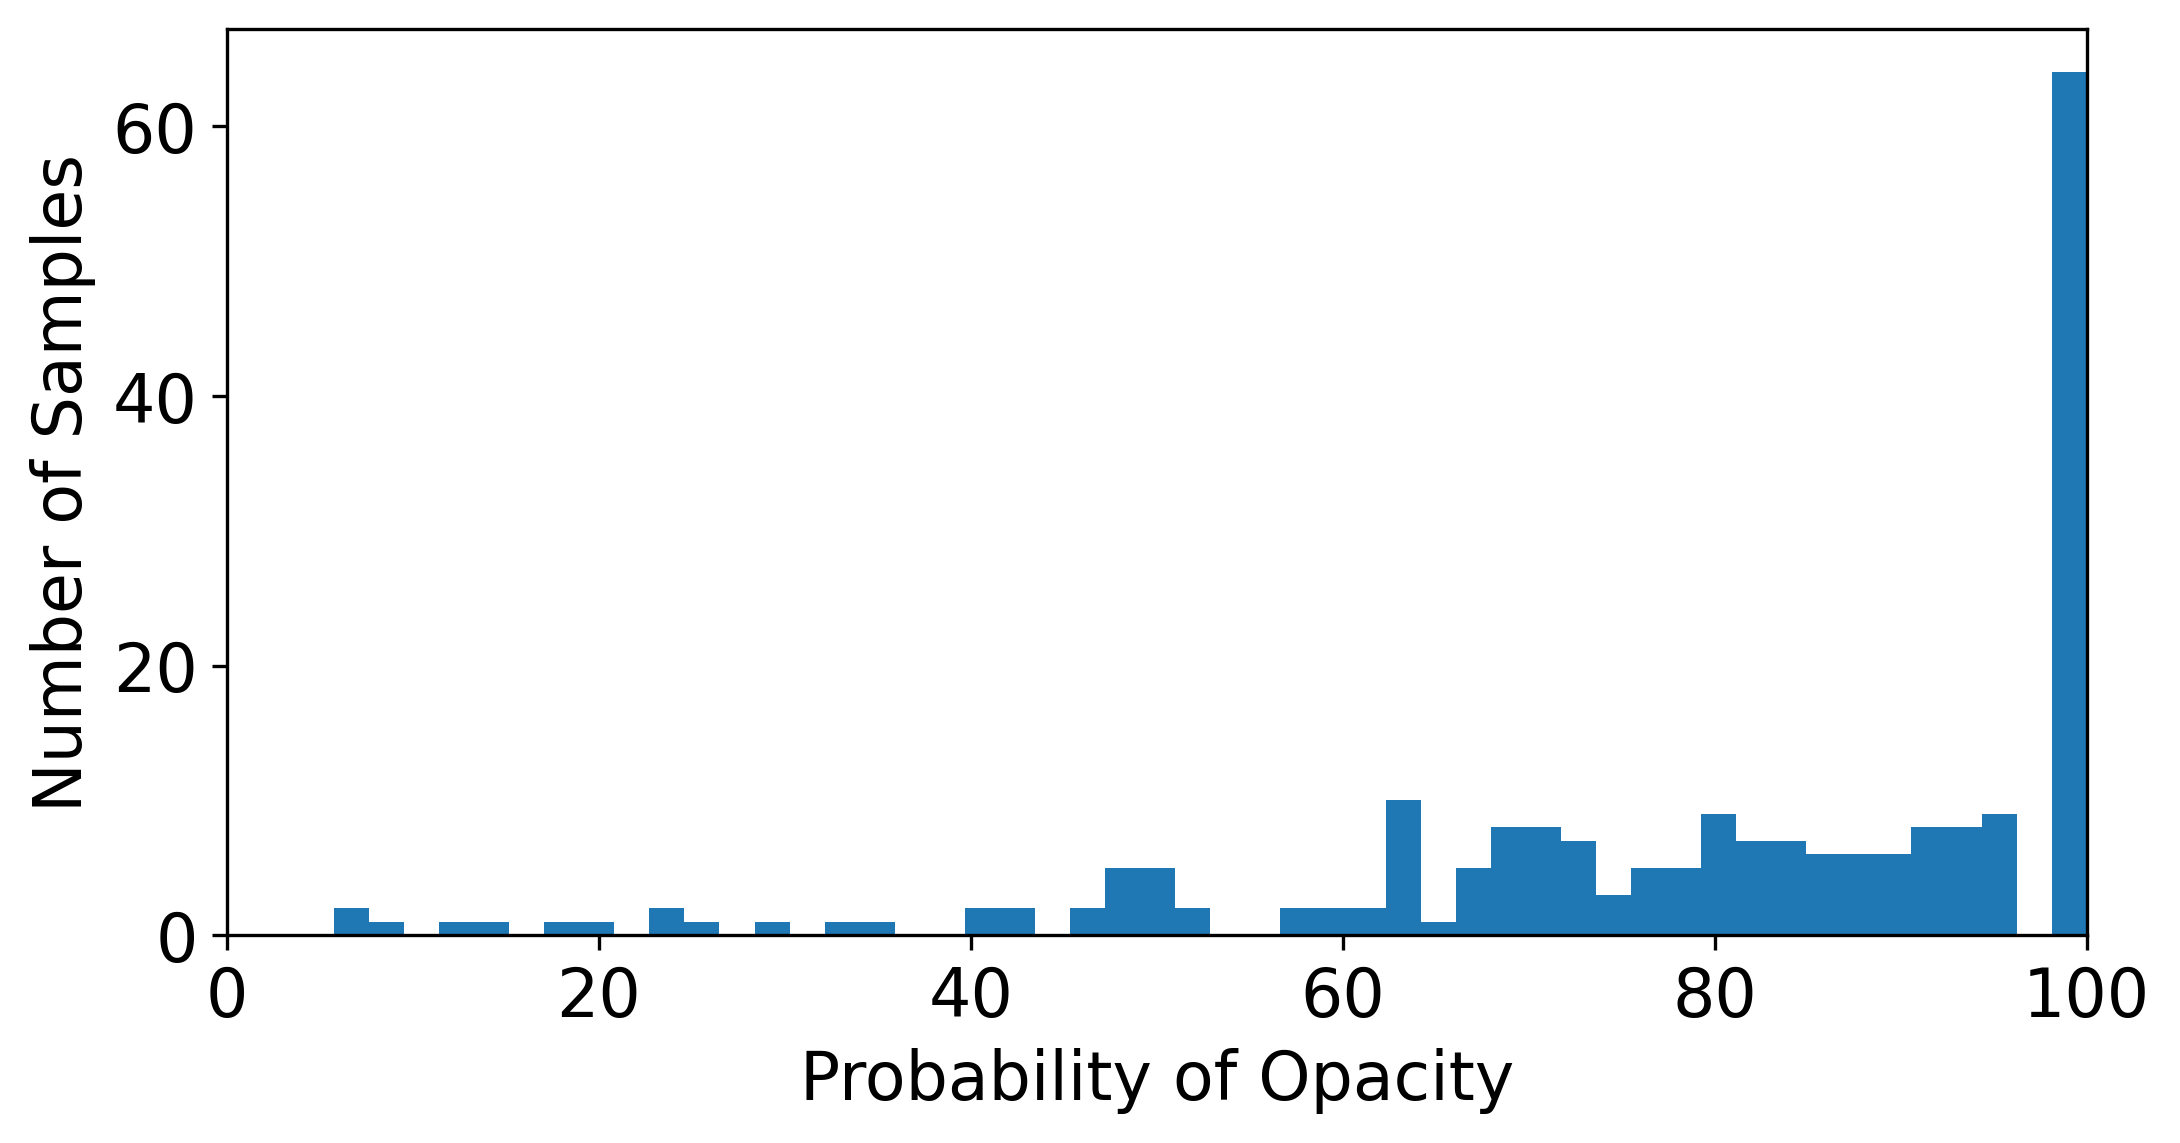

In [15]:
plt.hist(val_index_prob_1[:,1],50)

plt.xlabel("Probability of Opacity")
plt.ylabel("Number of Samples")
plt.xlim([0, 100])
plt.savefig('test_hist_class1.pdf', bbox_inches = 'tight') 

[[1.         1.         1.         1.         1.         1.
  0.99543379 0.99086758 0.99086758 0.98630137 0.98630137 0.98630137
  0.98630137 0.98173516 0.98173516 0.97716895 0.97716895 0.97716895
  0.97716895 0.97260274 0.97260274 0.96803653 0.96803653 0.96803653
  0.95890411 0.9543379  0.9543379  0.9543379  0.9543379  0.9543379
  0.9543379  0.94977169 0.94977169 0.94520548 0.94520548 0.94520548
  0.94063927 0.94063927 0.94063927 0.94063927 0.93607306 0.93150685
  0.92694064 0.92237443 0.92237443 0.92237443 0.92237443 0.91324201
  0.9086758  0.89497717 0.88127854 0.86757991 0.85844749 0.85844749
  0.85844749 0.85844749 0.85844749 0.84931507 0.84931507 0.84931507
  0.84474886 0.84018265 0.83105023 0.8173516  0.78538813 0.78082192
  0.78082192 0.76712329 0.75799087 0.73515982 0.71232877 0.69863014
  0.6803653  0.65753425 0.64840183 0.64383562 0.6347032  0.62557078
  0.60273973 0.59817352 0.58447489 0.55707763 0.52968037 0.52054795
  0.49771689 0.48858447 0.47031963 0.46118721 0.43835616 

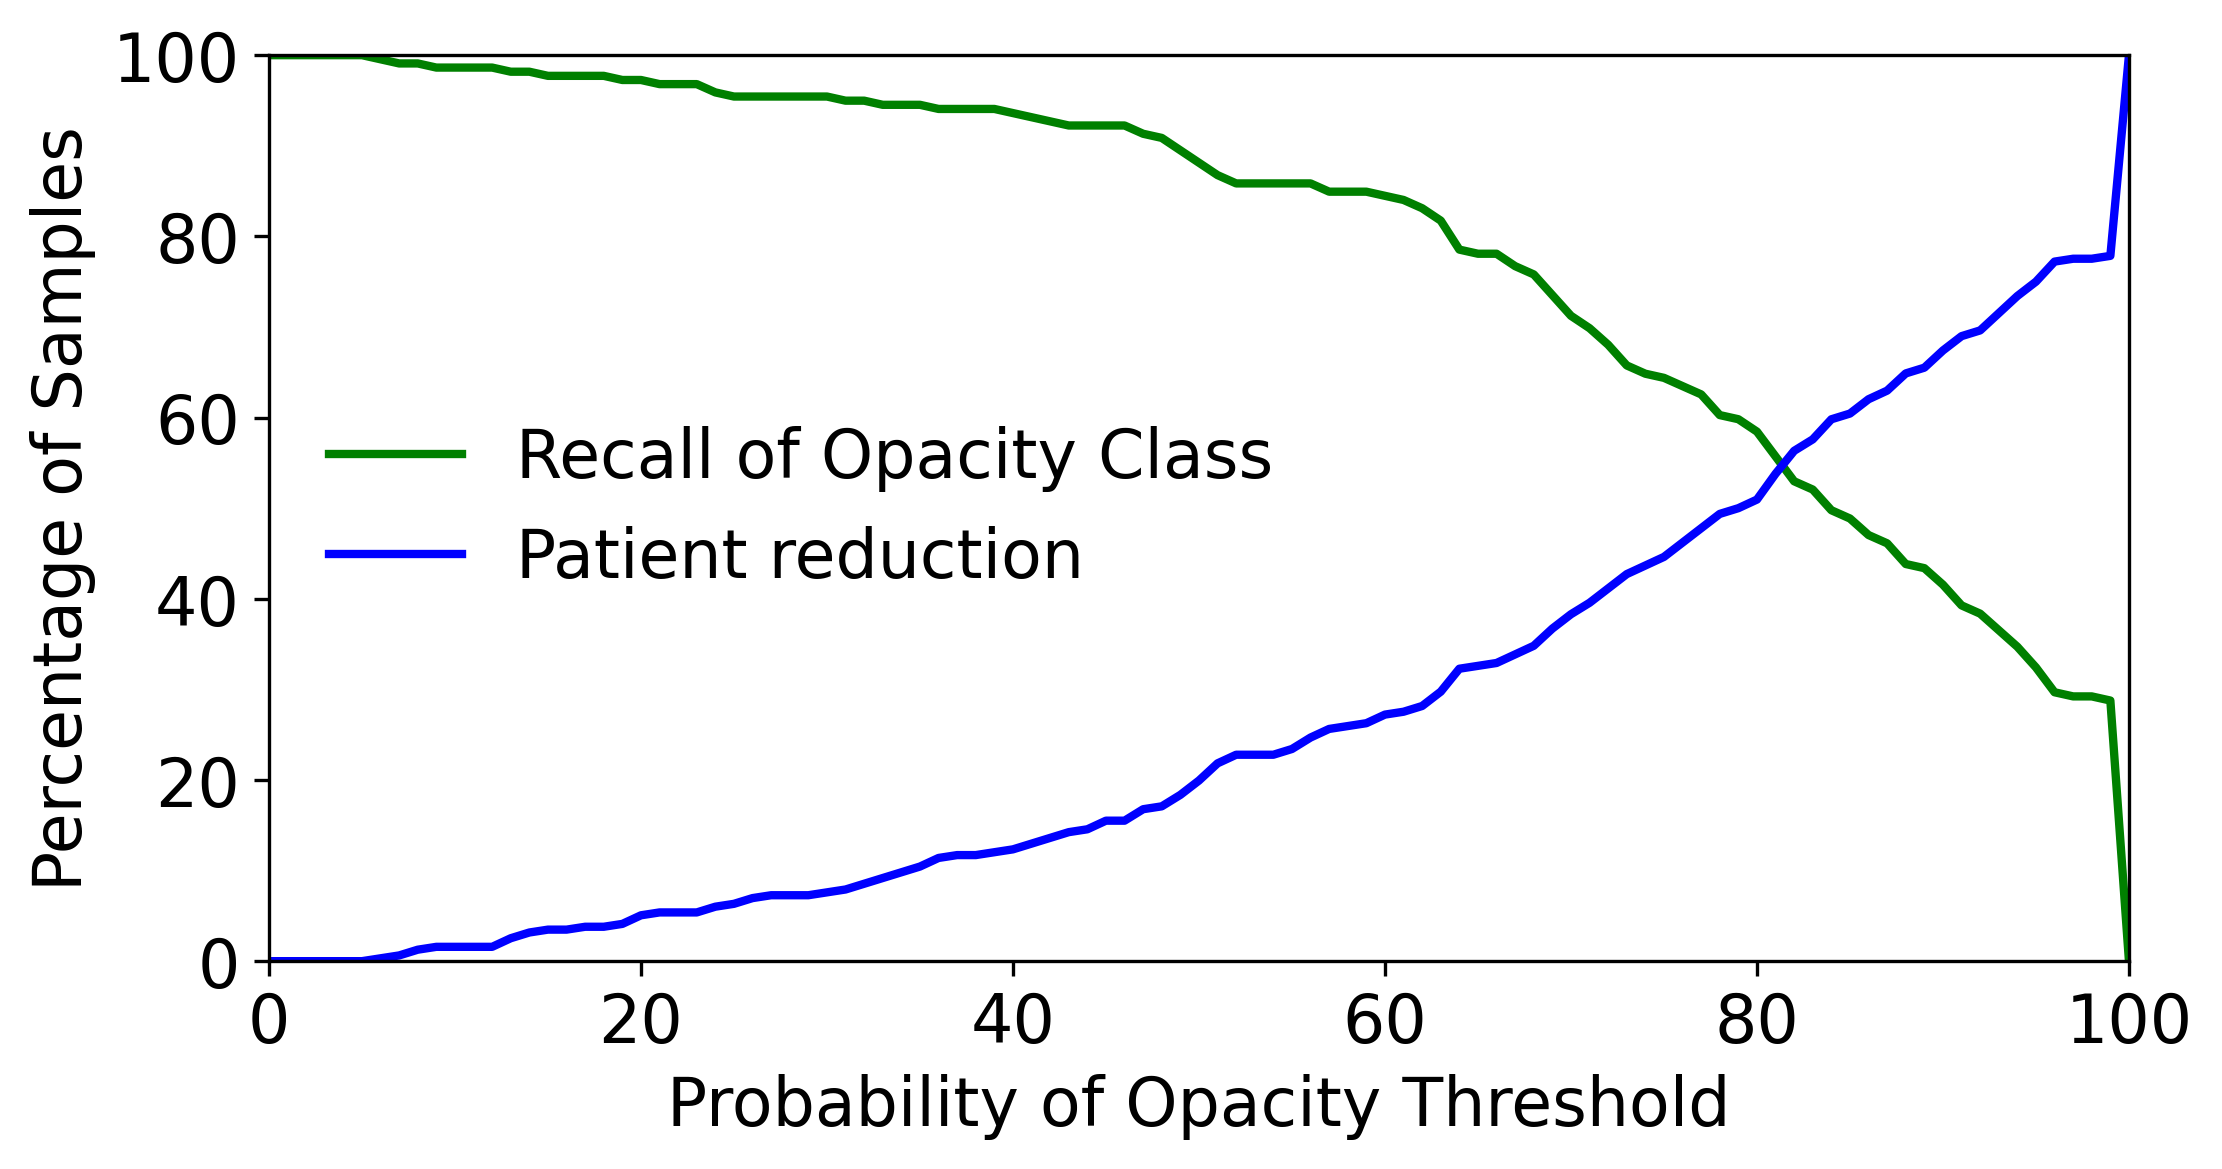

In [16]:
length_of_opacity = len(val_index_prob_1[:,1])
length_of_none = len(val_index_prob_0[:,1])

opacity_covered = np.zeros([101,1])
patient_reduction = np.zeros([101,1])

for iter1 in range(101):
    opacity_covered[iter1] = np.sum(val_index_prob_1[:,1] > iter1) / length_of_opacity
    patient_reduction[iter1] = (np.sum(val_index_prob_1[:,1] <= iter1) + np.sum(val_index_prob_0[:,1] <= iter1)) / (length_of_opacity + length_of_none)
    
print(np.transpose(opacity_covered),'\n\n', np.transpose(patient_reduction))
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 300

plt.plot(range(101),opacity_covered*100,  color = 'green', linewidth=2)
plt.plot(range(101),patient_reduction*100, color = 'blue', linewidth=2)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Probability of Opacity Threshold")
plt.ylabel("Percentage of Samples")
plt.legend(["Recall of Opacity Class","Patient reduction"], loc ="center left", frameon=False)
plt.savefig('test_opacityTH.pdf', bbox_inches = 'tight')  